# 지역별 여가활동과 문화누리카드 가맹점 비교

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
%cd C:\python

### 문화누리카드 오프라인 가맹점 데이터

In [ ]:
#문화누리카드 오프라인 가맹점 데이터

nuri_offline = pd.read_csv('datas/한국문화예술위원회_문화누리카드 오프라인 가맹점 목록_20211222.csv',encoding='cp949')
nuri_offline

In [ ]:
len(nuri_offline)   #전체 자료수

In [ ]:
nuri_offline.info()  #결측치 존재 X

In [ ]:
#지역별 자료수
nuri_offline.지역.value_counts()

In [ ]:
#분류별 자료수
nuri_offline.분류.value_counts()

In [ ]:
#지역 column 고유값 확인
nuri_offline['지역'].unique()

In [ ]:
#지역 이름 뒤에 띄어쓰기 제거
nuri_offline['지역'] = nuri_offline['지역'].str[:-1]

In [ ]:
#분류 column 고유값 확인
nuri_offline["분류"].unique()

### 1년동안 가장 많이 한 여가활동

In [ ]:
#1년 동안 가장 많이 참여한 여가 활동 데이터 불러오기
culture = pd.read_csv('datas/지난_1년_동안_가장_많이_참여한_여가활동__1순위__중분류_20230320002311.csv',encoding='cp949')
culture

In [ ]:
culture.columns

In [ ]:
del culture["통계분류(1)"]

In [ ]:
culture.head()

In [ ]:
#column명 변경
culture.columns=['분류', '표본수', '문화예술관람활동', '문화예술참여활동', '스포츠관람활동','스포츠참여활동', '관광활동', '취미오락활동', '휴식활동', '사회및 기타활동']

In [ ]:
#첫 행 제거
culture=culture.loc[1:,:]
culture

### 가맹점 분류를 여가활동 카테고리로 수정
- 미술 columm에서 사진,표구 데이터 분리

    - 문화예술관람 : 영상,공연,미술
    - 문화예술참여 : 문화체험,표구
    - 스포츠관람 : 스포츠관람
    - 스포츠참여 : 체육용품,체육시설
    - 관광활동 : 관광지,여행사,교통수단
    - 휴식활동 : 숙박,음악
    - 취미오락 : 도서,사진

#### 미술 분류 중에서 사진,표구 분류

In [ ]:
#분류 기준 단어
cat_photo = ["스튜디오", "사진", "포토", "photo"] 
cat_pen = ['문구','표구']

In [ ]:
#기준 단어를 포함하는 사진 데이터 확인
art = [nuri_offline["가맹점명"].str.lower().str.contains(word) for word in cat_photo]
art

In [ ]:
##기준 단어를 포함하는 표구 데이터 확인
pen = [nuri_offline["가맹점명"].str.lower().str.contains(word) for word in cat_pen]
pen

In [ ]:
#하나라도 True이면 True
art_bool = art[0]
for a in art:
    art_bool = art_bool|a  

In [ ]:
#하나라도 True이면 True
pen_bool = pen[0]
for p in pen:
    pen_bool = pen_bool|p  

In [ ]:
art_bool

In [ ]:
pen_bool

In [ ]:
#사진 데이터 bool인덱싱 
photo_result = nuri_offline[art_bool][nuri_offline[art_bool]['분류']=='미술']
photo_result

In [ ]:
#표구 데이터 bool 인덱싱
pen_result = nuri_offline[pen_bool][nuri_offline[pen_bool]['분류']=='미술']
pen_result

In [ ]:
#분류 이름 사진,표구로 변경
nuri_offline.loc[photo_result.index, "분류"] = "사진"
nuri_offline.loc[pen_result.index, "분류"] = "표구"

In [ ]:
#분류가 사진인 데이터 확인
nuri_offline[nuri_offline["분류"]=="사진"]

In [ ]:
#분류가 표구인 데이터 확인
nuri_offline[nuri_offline["분류"]=="표구"]

In [ ]:
nuri_offline.분류.value_counts()

#### 카테고리 분류
    - 문화예술관람 : 영상,공연,미술
    - 문화예술참여 : 문화체험,표구
    - 스포츠관람 : 스포츠관람
    - 스포츠참여 : 체육용품,체육시설
    - 관광활동 : 관광지,여행사,교통수단
    - 휴식활동 : 숙박,음악
    - 취미오락 : 도서,사진

In [ ]:
#분류 기준 단어
c_w = ["영상","공연","미술"] 
c_j = ['문화체험','표구']
sp_w = ['스포츠관람']
sp_j = ['체육용품','체육시설']
tr = ['관광지','여행사','교통수단','숙박']
rest = ['음악']
hob = ['도서','사진']

In [ ]:
#문화예술관람 카테고리 분류
cul_w= [nuri_offline["분류"].str.lower().str.contains(word) for word in c_w ]

#하나라도 True이면 True
cul_w_bool = cul_w[0]
for c in cul_w:
    cul_w_bool = cul_w_bool|c  
    
df_cul_w = nuri_offline[cul_w_bool]
df_cul_w['국민여가'] = ['문화예술관람' for i in range(2746)]
df_cul_w
    

In [ ]:
cul_w_bool.sum()

In [ ]:
#문화예술참여 카테고리 분류
cul_j= [nuri_offline["분류"].str.lower().str.contains(word) for word in c_j ]

#하나라도 True이면 True
cul_j_bool = cul_j[0]
for c in cul_j:
    cul_j_bool = cul_j_bool|c  
    
df_cul_j = nuri_offline[cul_j_bool]
df_cul_j['국민여가'] = ['문화예술참여' for i in range(1904)]
df_cul_j
    

In [ ]:
nuri_offline[cul_j_bool]

In [ ]:
cul_j_bool.sum()

In [ ]:
#스포츠관람 카테고리 분류
sports_w= [nuri_offline["분류"].str.lower().str.contains(word) for word in sp_w ]

#하나라도 True이면 True
sports_w_bool = sports_w[0]
for c in sports_w:
    sports_w_bool = sports_w_bool|c  
    
df_sports_w = nuri_offline[sports_w_bool]
df_sports_w['국민여가'] = ['스포츠관람' for i in range(51)]
df_sports_w
    

In [ ]:
sports_w_bool.sum()

In [ ]:
#스포츠참여 카테고리 분류
sports_j= [nuri_offline["분류"].str.lower().str.contains(word) for word in sp_j ]

#하나라도 True이면 True
sports_j_bool = sports_j[0]
for c in sports_j:
    sports_j_bool = sports_j_bool|c  
    
df_sports_j = nuri_offline[sports_j_bool]
df_sports_j['국민여가'] = ['스포츠참여' for i in range(4519)]
df_sports_j
    

In [ ]:
sports_j_bool.sum()

In [ ]:
#관광활동 카테고리 분류
travel= [nuri_offline["분류"].str.lower().str.contains(word) for word in tr ]

#하나라도 True이면 True
travel_bool = travel[0]
for c in travel:
    travel_bool = travel_bool|c  
    
df_travel = nuri_offline[travel_bool]
df_travel['국민여가'] = ['관광활동' for i in range(7742)]
df_travel
    

In [ ]:
travel_bool.sum()

In [ ]:
#휴식활동 카테고리 분류
rest_cat= [nuri_offline["분류"].str.lower().str.contains(word) for word in rest ]

#하나라도 True이면 True
rest_bool = rest_cat[0]
for c in rest_cat:
    rest_bool = rest_bool|c  
    
df_rest = nuri_offline[rest_bool]
    

In [ ]:
df_rest['국민여가']=['휴식활동' for i in range(503)]      
df_rest

In [ ]:
rest_bool.sum()

In [ ]:
#취미오락 카테고리 분류
hobby= [nuri_offline["분류"].str.lower().str.contains(word) for word in hob ]

#하나라도 True이면 True
hobby_bool = hobby[0]
for c in hobby:
    hobby_bool = hobby_bool|c  
    
df_hobby = nuri_offline[hobby_bool]
df_hobby['국민여가'] = ['취미오락' for i in range(6019)]
df_hobby
    

In [ ]:
len(df_hobby)

In [ ]:
#데이터 프레임 합치기
result_df = pd.concat([df_cul_w,df_cul_j,df_sports_w,df_sports_j,df_travel,df_rest,df_hobby])
result_df.국민여가.unique()

##### 국민여가 column 추가된 데이터프레임

In [ ]:
result_df

## 지역별 가맹점 비율 시각화

In [73]:
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

Noto Sans KR
D2Coding
Gowun Batang
Noto Sans KR
D2Coding
Noto Sans KR
Gowun Batang
Noto Sans KR
Noto Sans KR
Noto Sans KR


In [74]:
global_font = {'family':'D2Coding','size' : 12 , 'weight':'bold'}

#폰트 설정
mpl.rc('font',**global_font)

#유니코드에서 음수 부호 설정
mpl.rc('axes',unicode_minus=False)

#주피터 내부에 그림 표시 (magic명령)
%matplotlib inline

In [75]:
#폰트 설정
mpl.rcParams['font.family'] = 'D2Coding'
print(mpl.rcParams['font.family'])

['D2Coding']


In [162]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.grid'] = False

In [161]:
#그래프 배경 설정
import seaborn as sns
sns.set_theme(style='whitegrid')

### 지역별 가맹점 비율 그래프(각각)

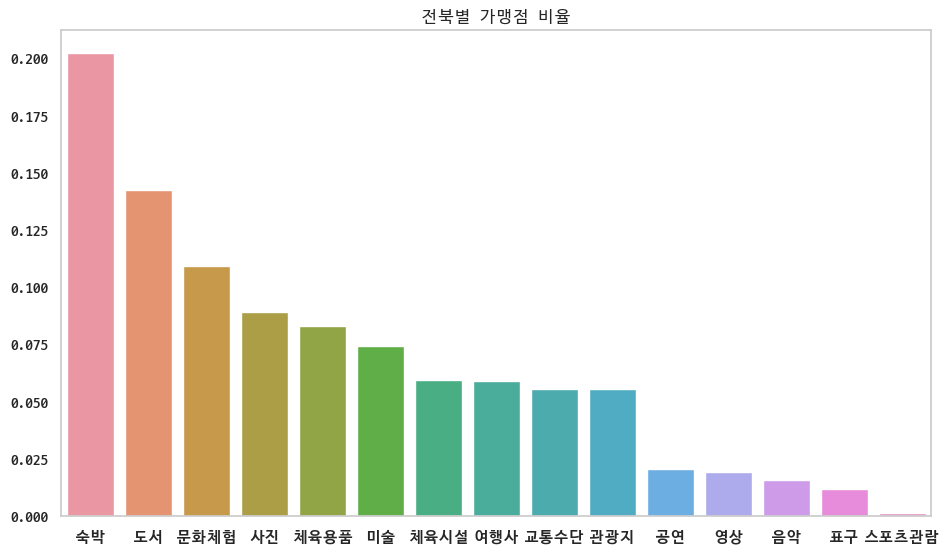

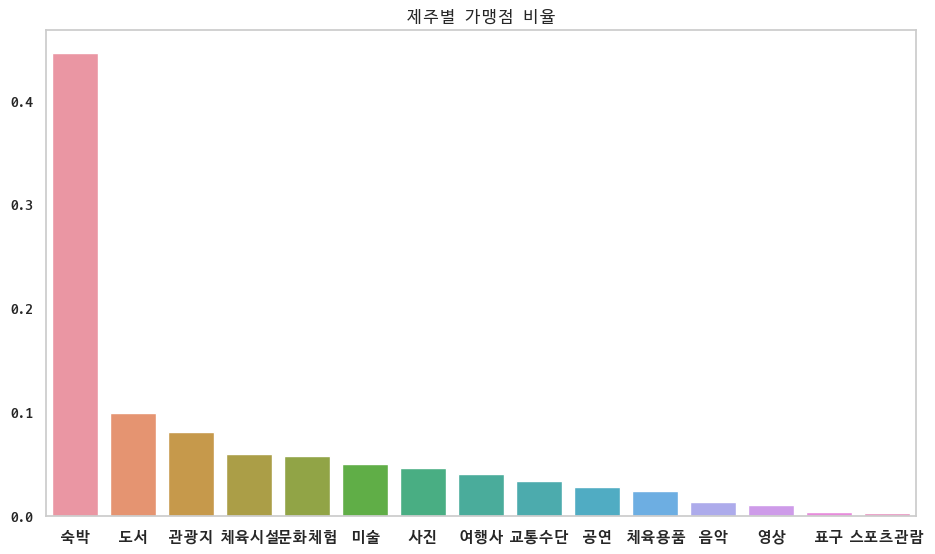

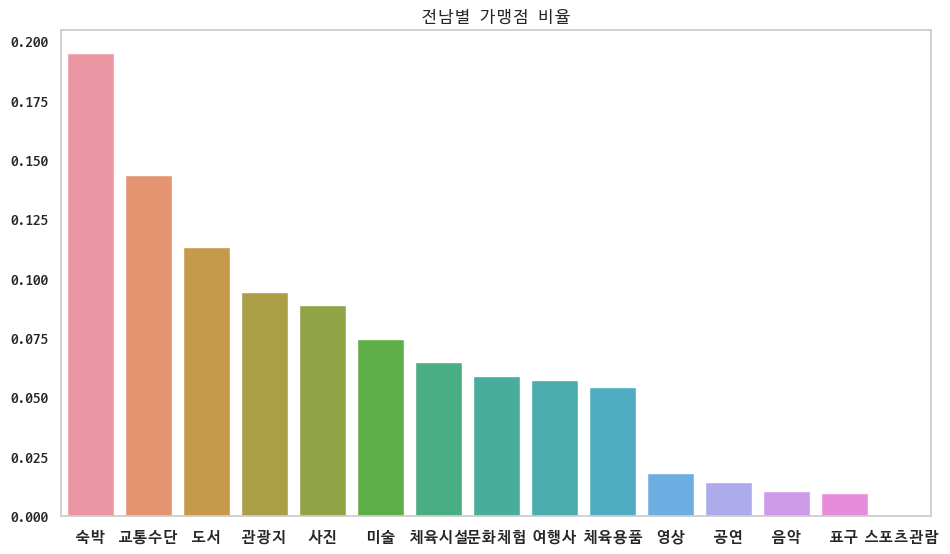

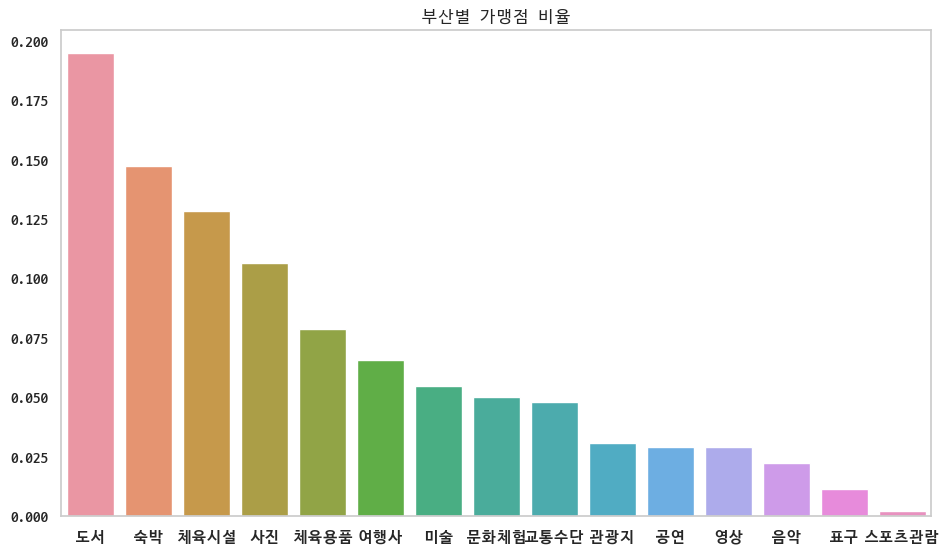

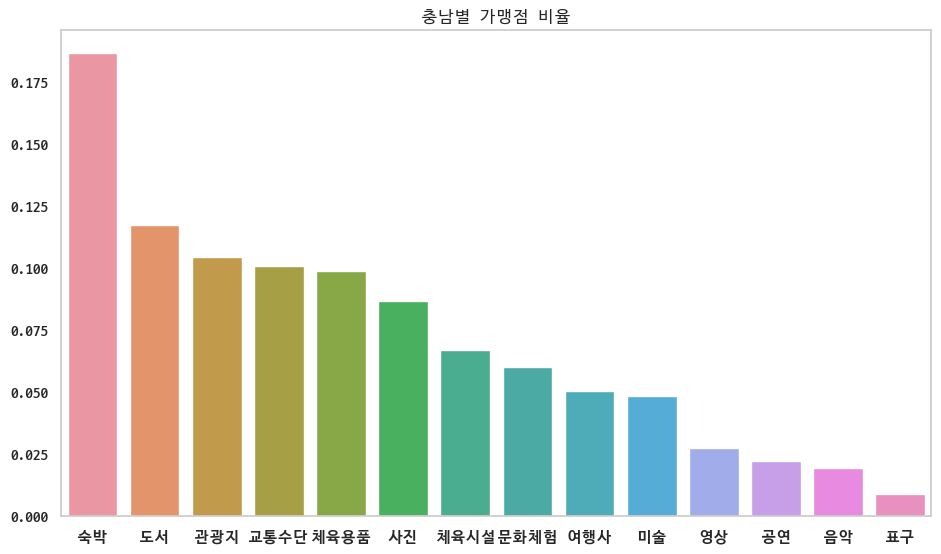

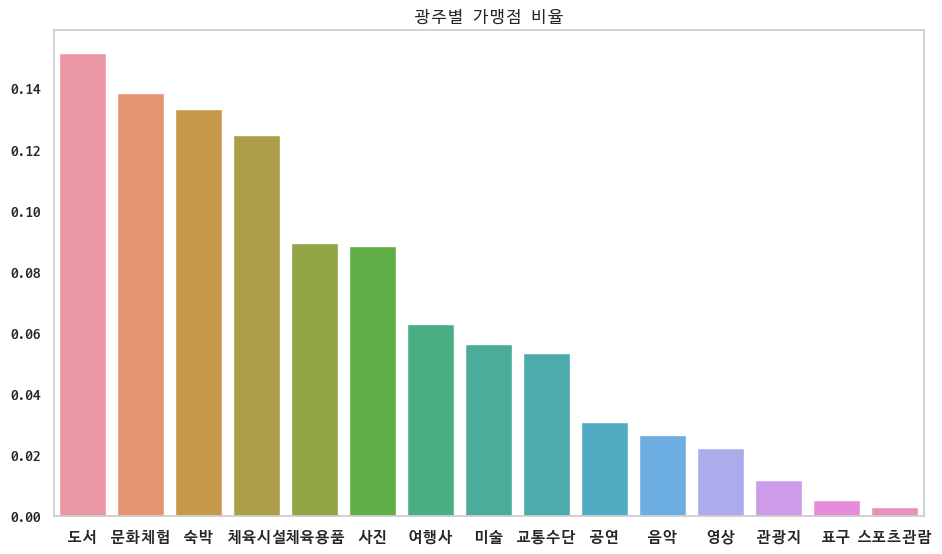

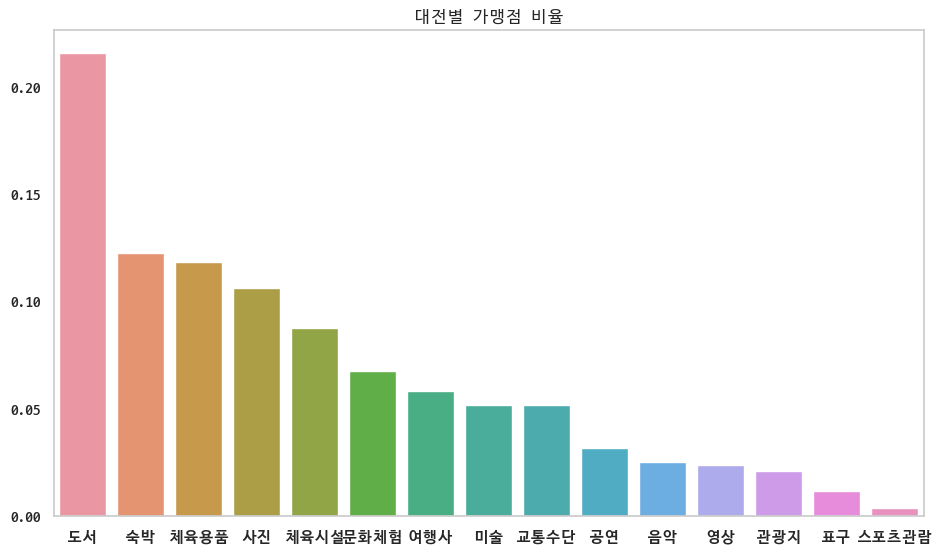

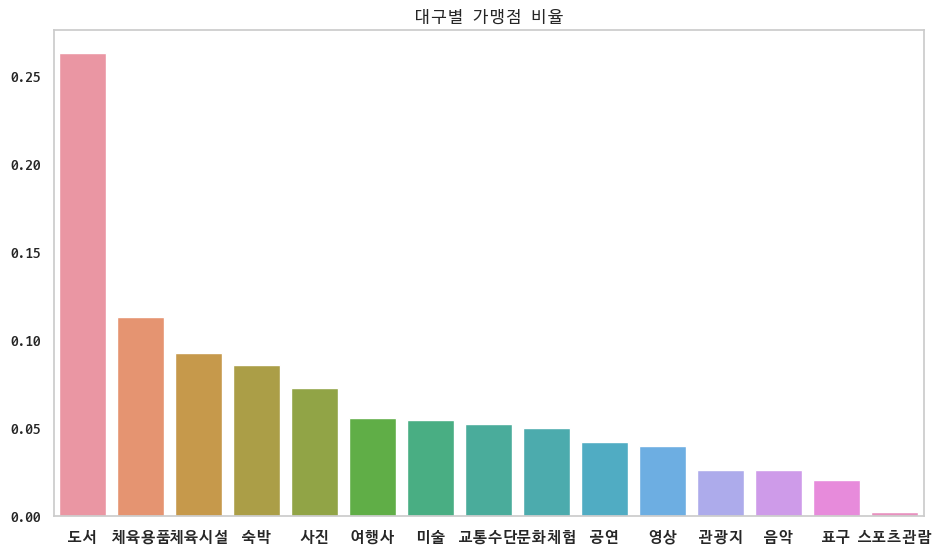

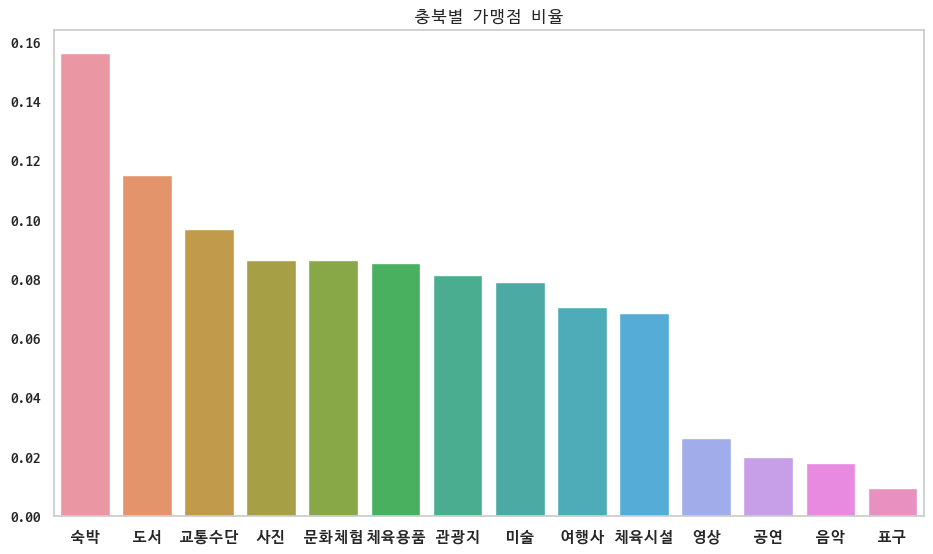

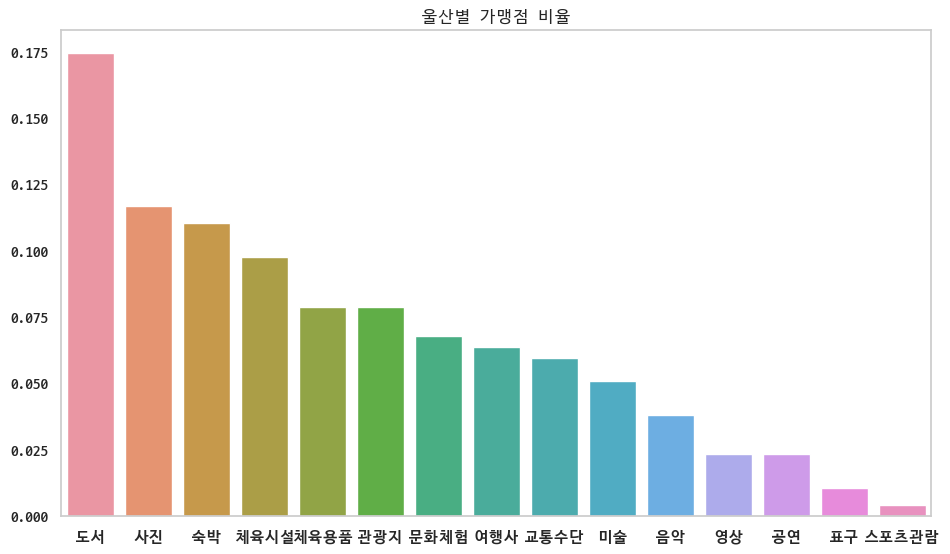

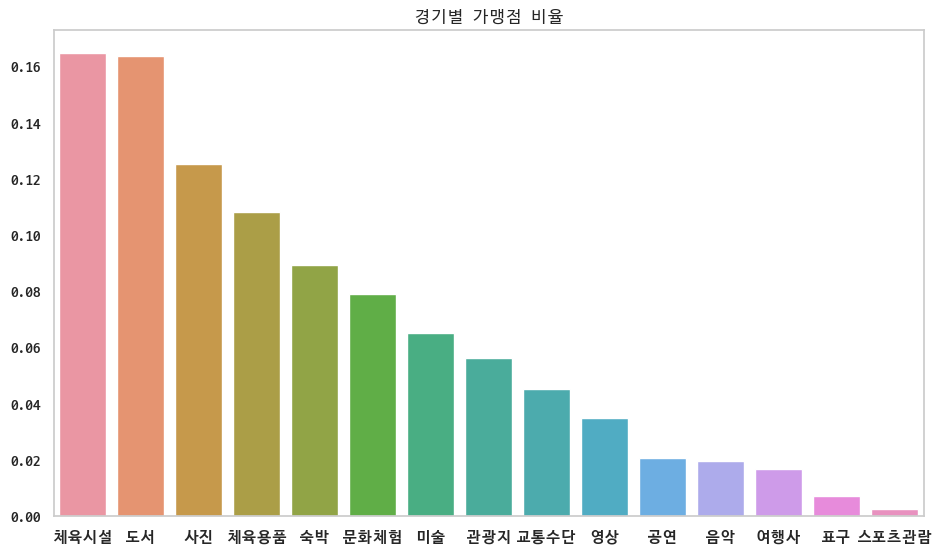

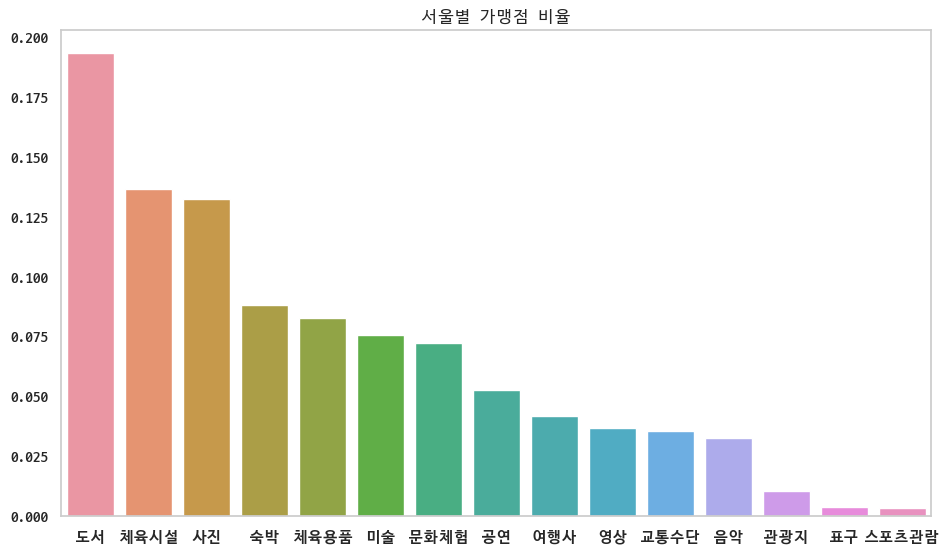

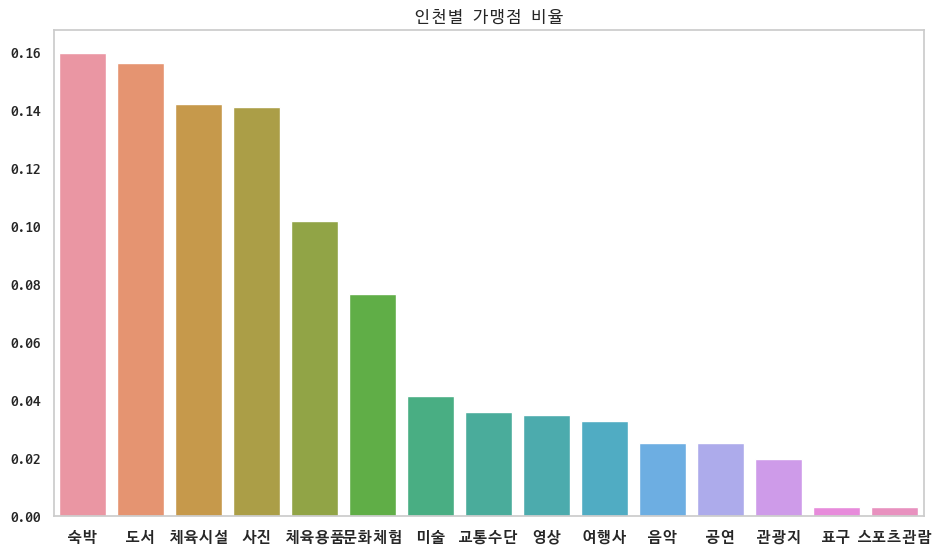

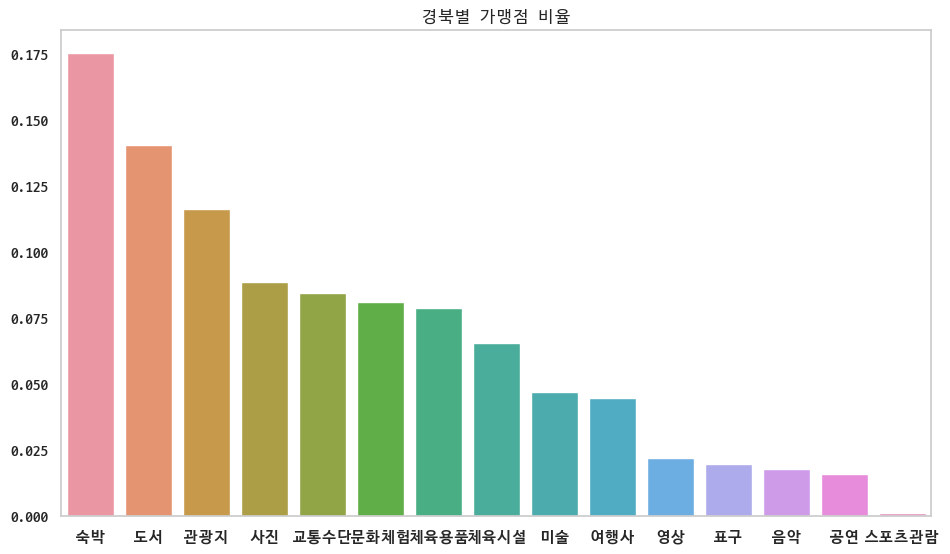

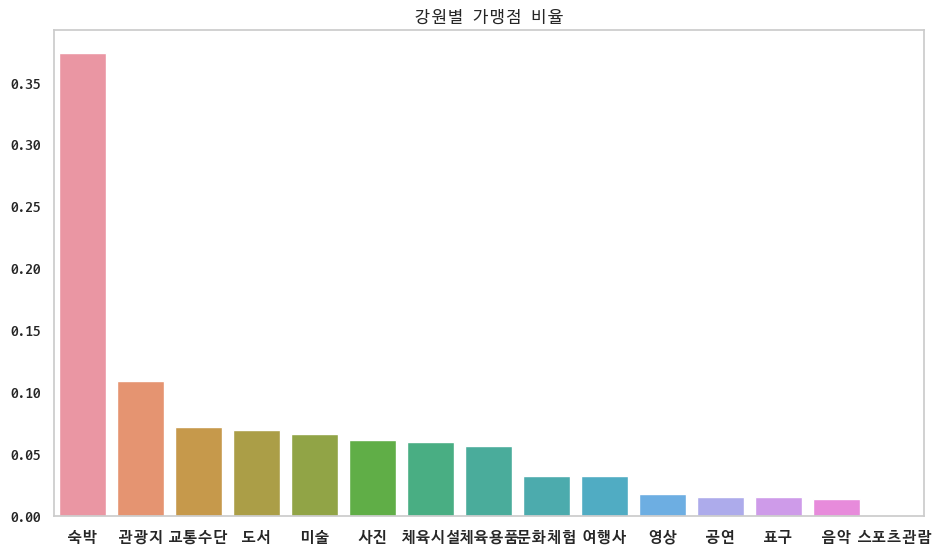

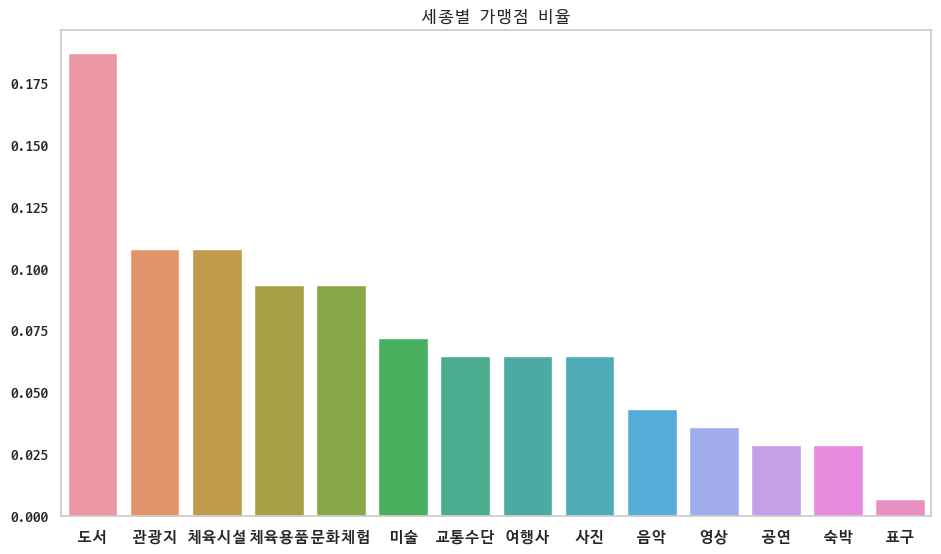

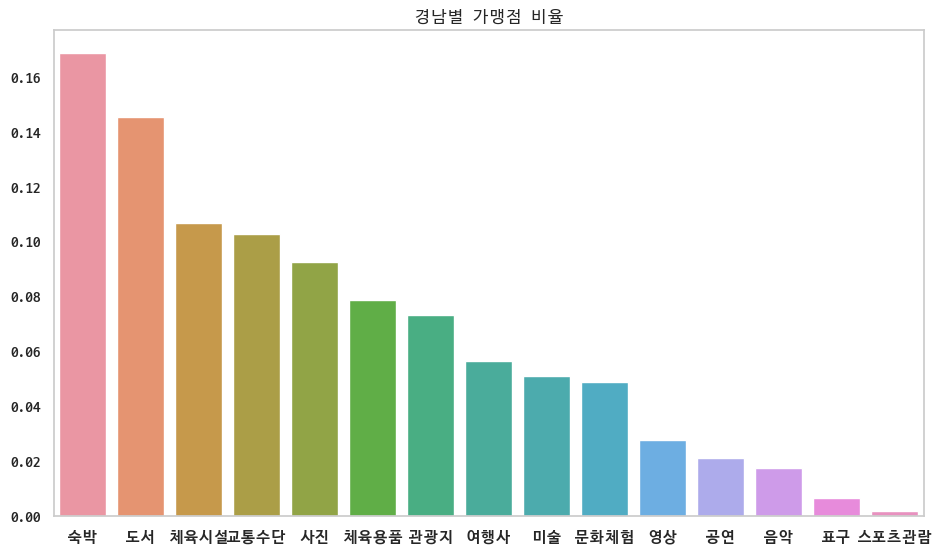

In [207]:
for cat in nuri_offline["지역"].unique():
    data = nuri_offline[nuri_offline["지역"] == cat]["분류"].value_counts(True)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'{cat}별 가맹점 비율')
    sns.barplot(x=data.index,y=data.values)

### 국민여가별 가맹점 비율 그래프(각각)

In [ ]:
for cat in result_df["국민여가"].unique():
    data = result_df[result_df["국민여가"] == cat]["지역"].value_counts(True) * 100
    
    plt.figure(figsize=(10, 6))
    plt.title(f'{cat} 활동의 지역별 가맹점 비율')
    sns.barplot(x=data.index,y=data.values)

### 지역별 가맹점 비율 그래프(각각)

In [ ]:
data.index

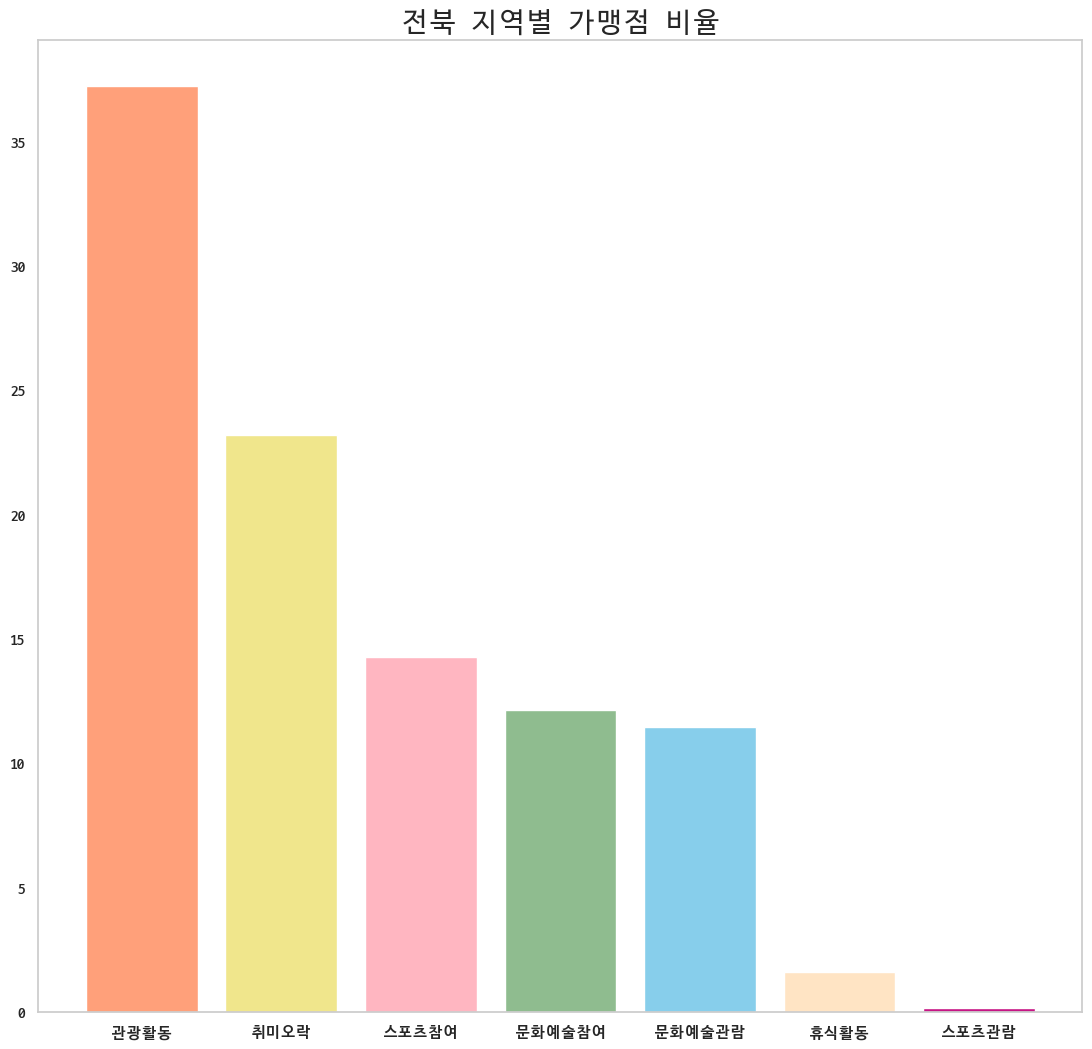

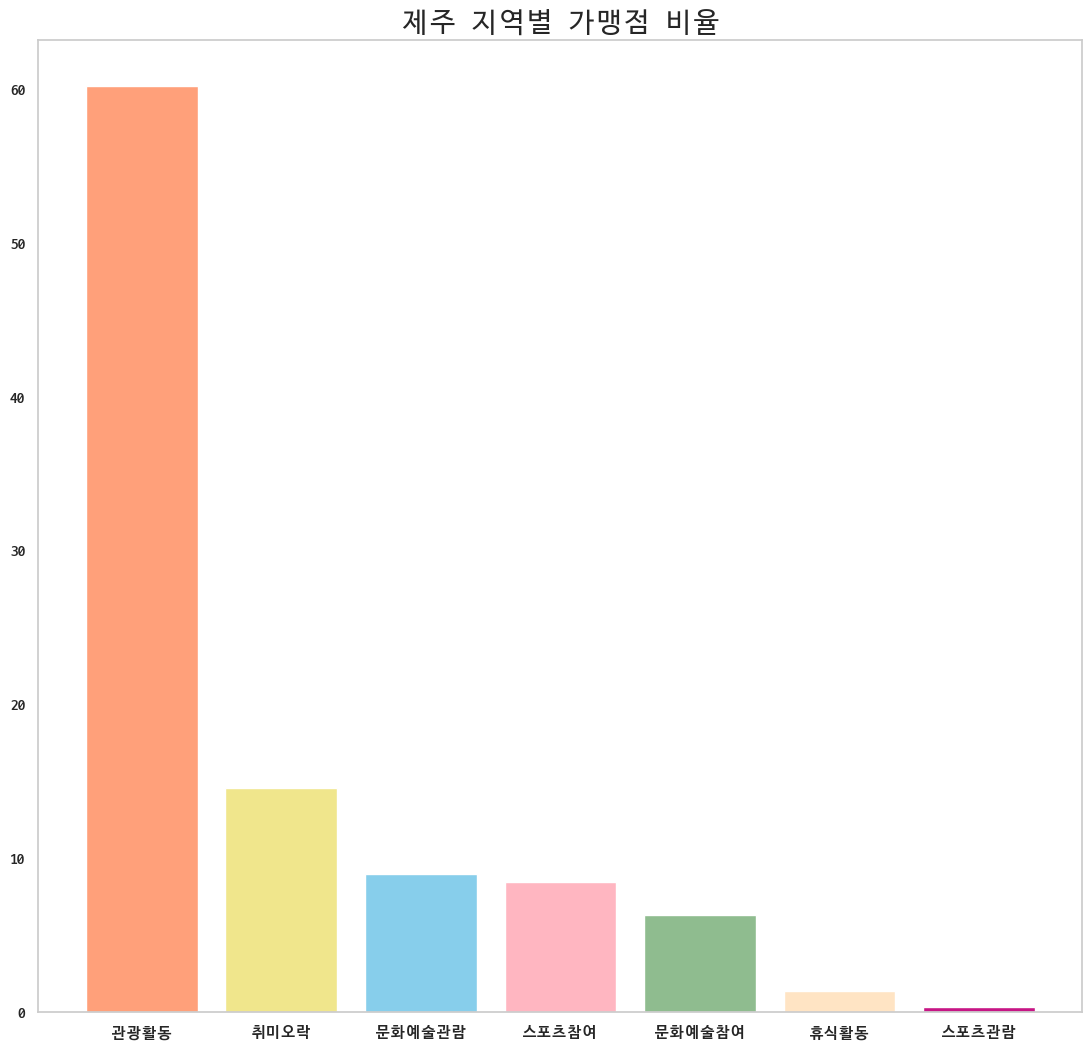

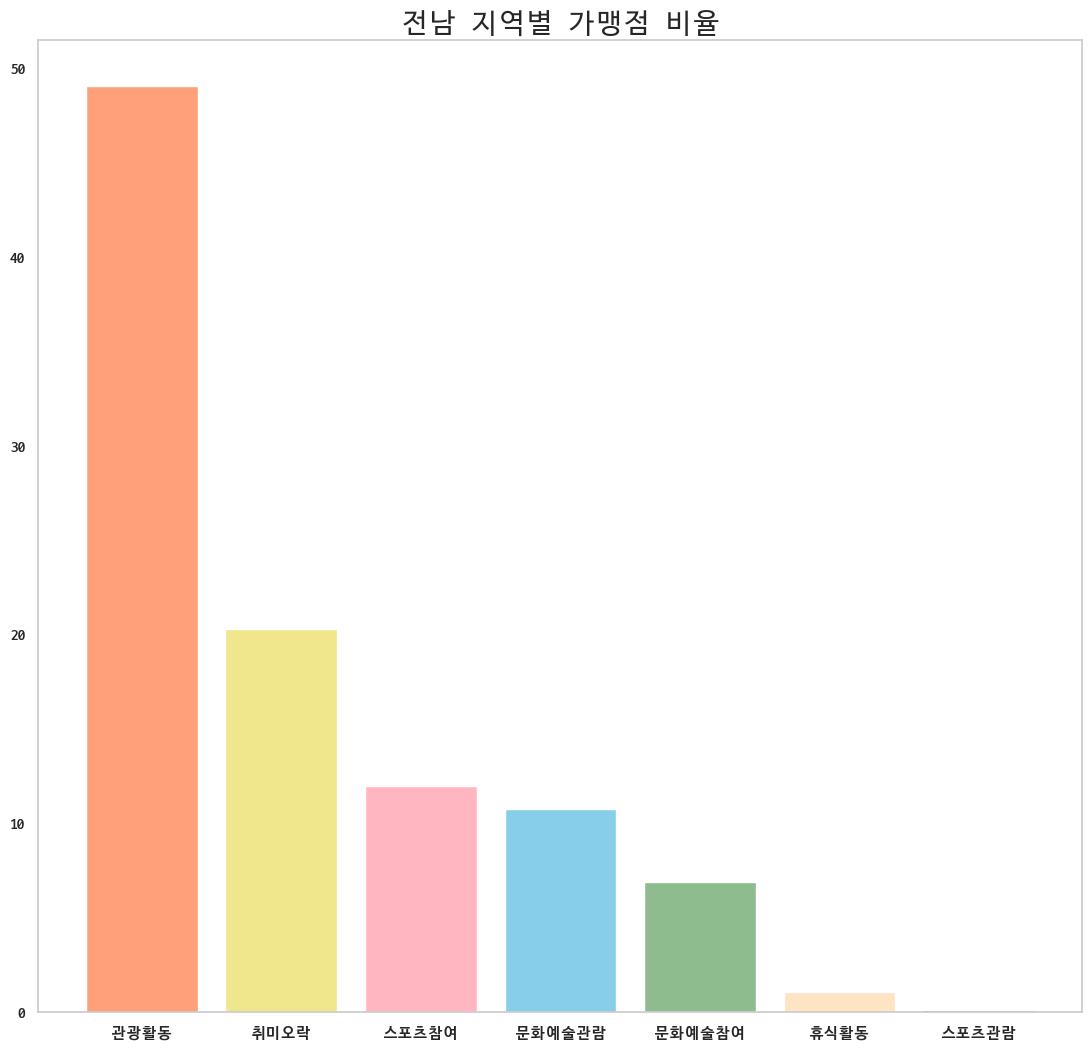

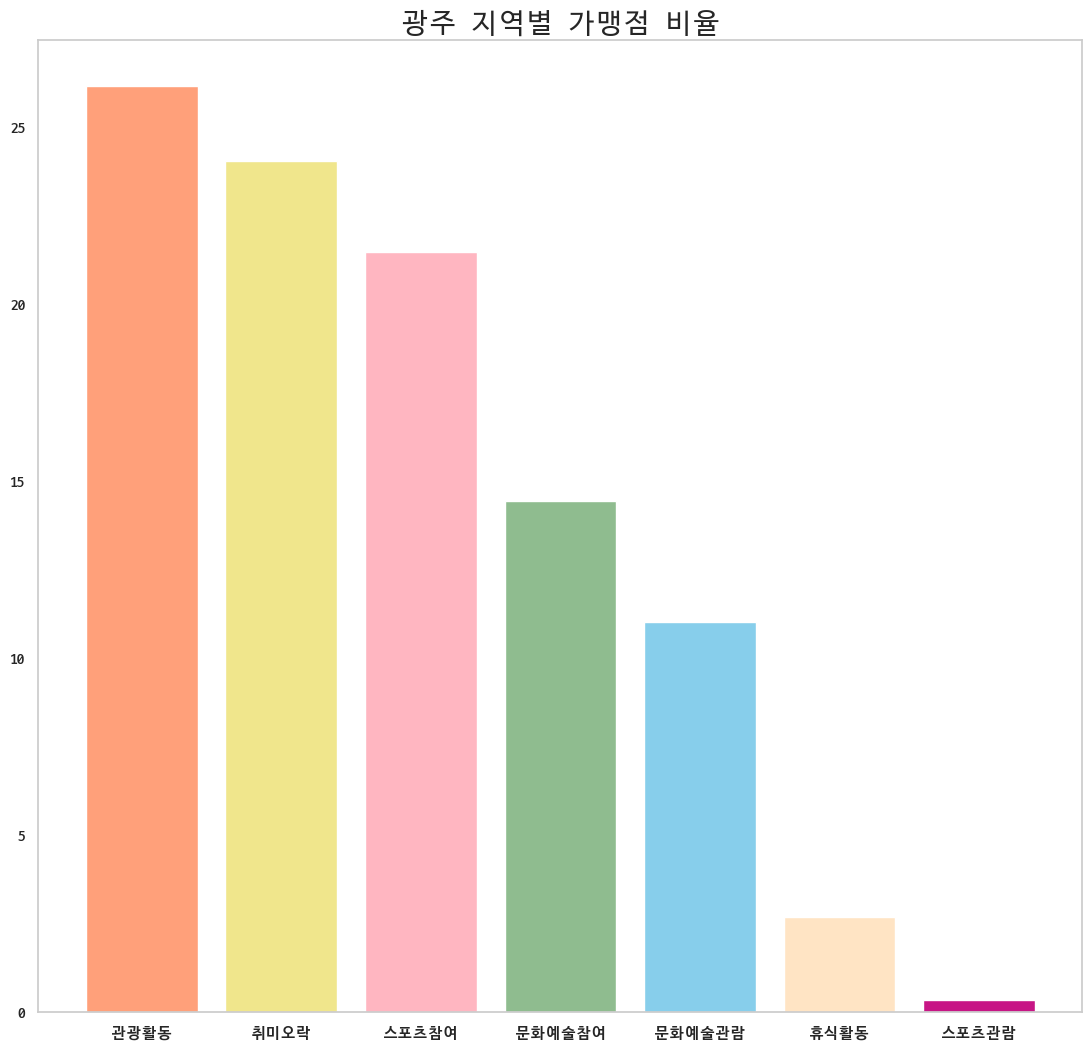

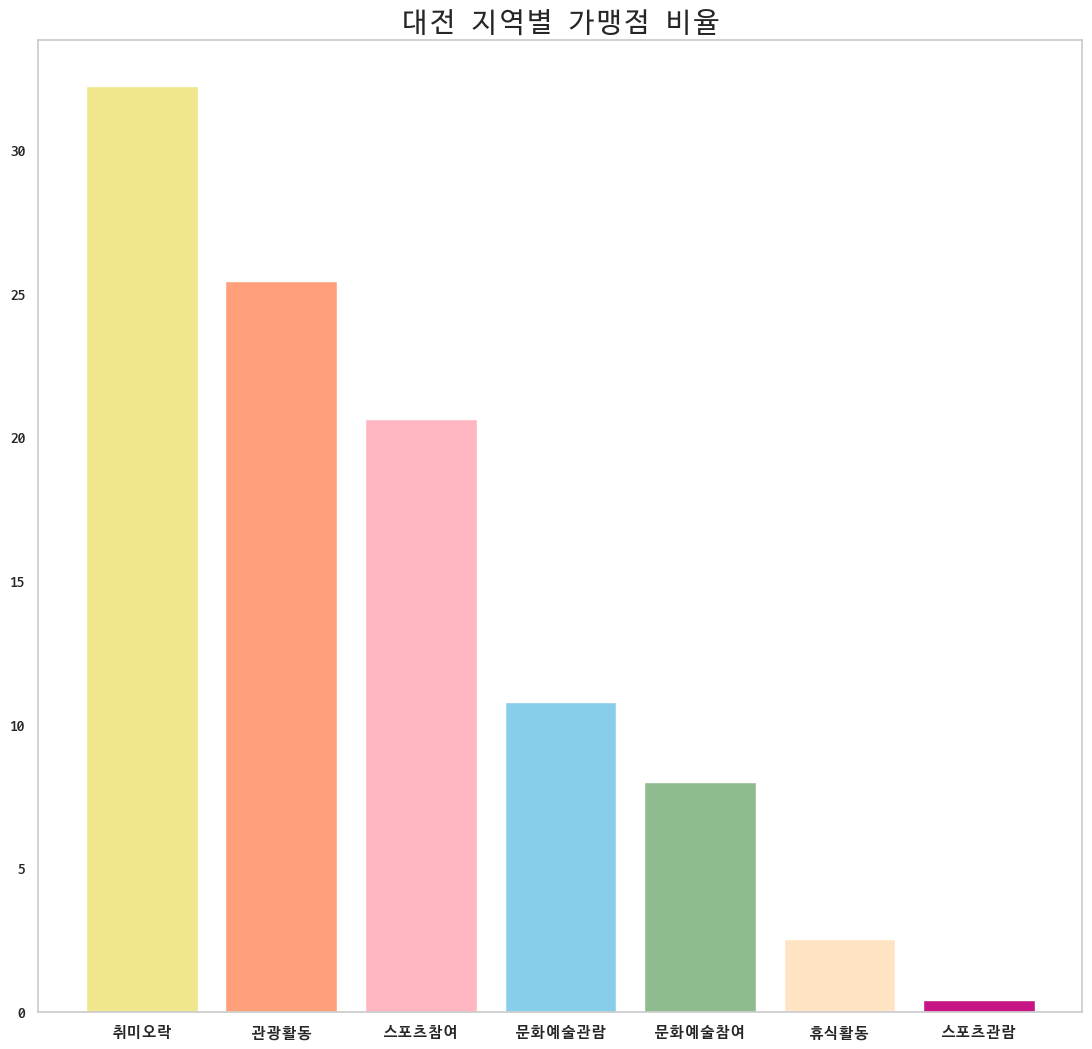

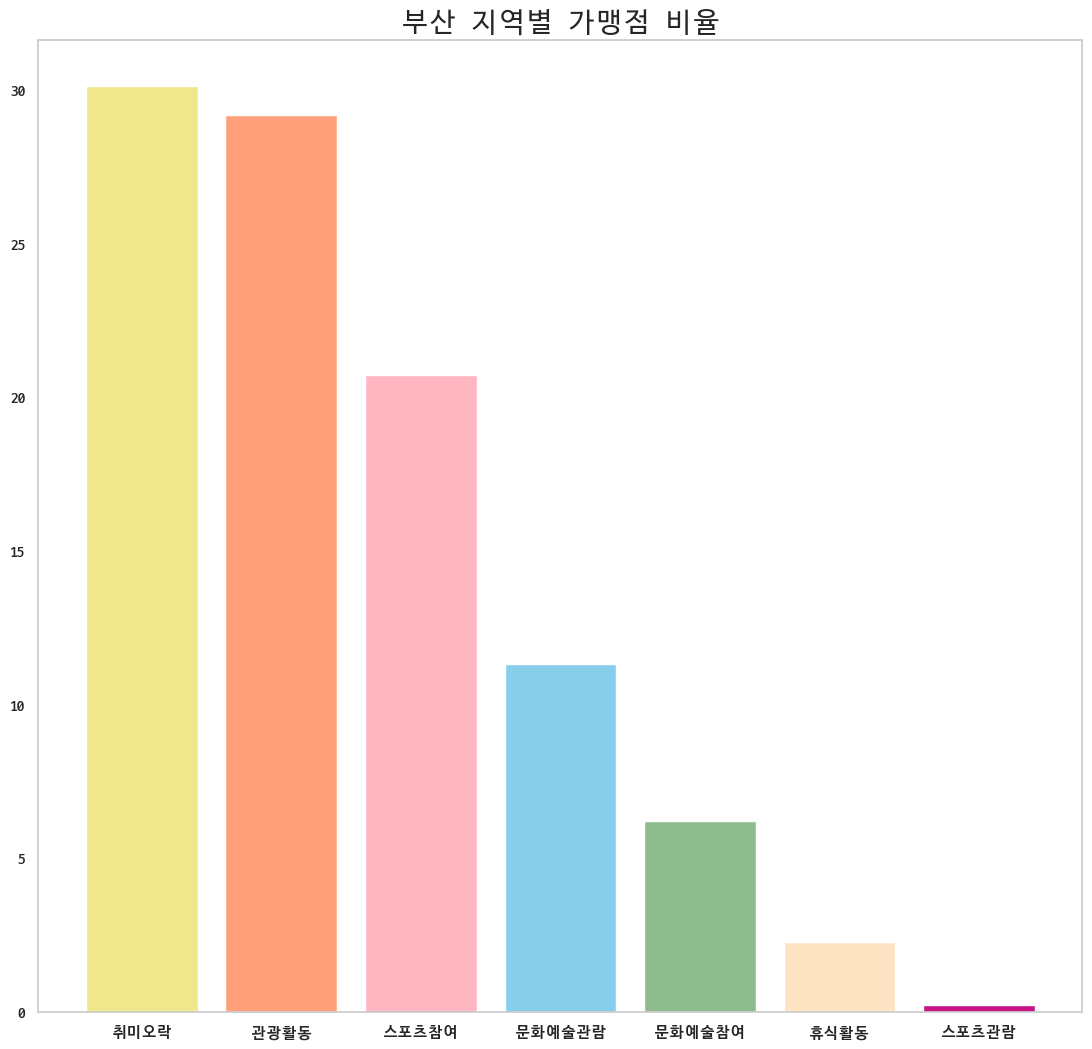

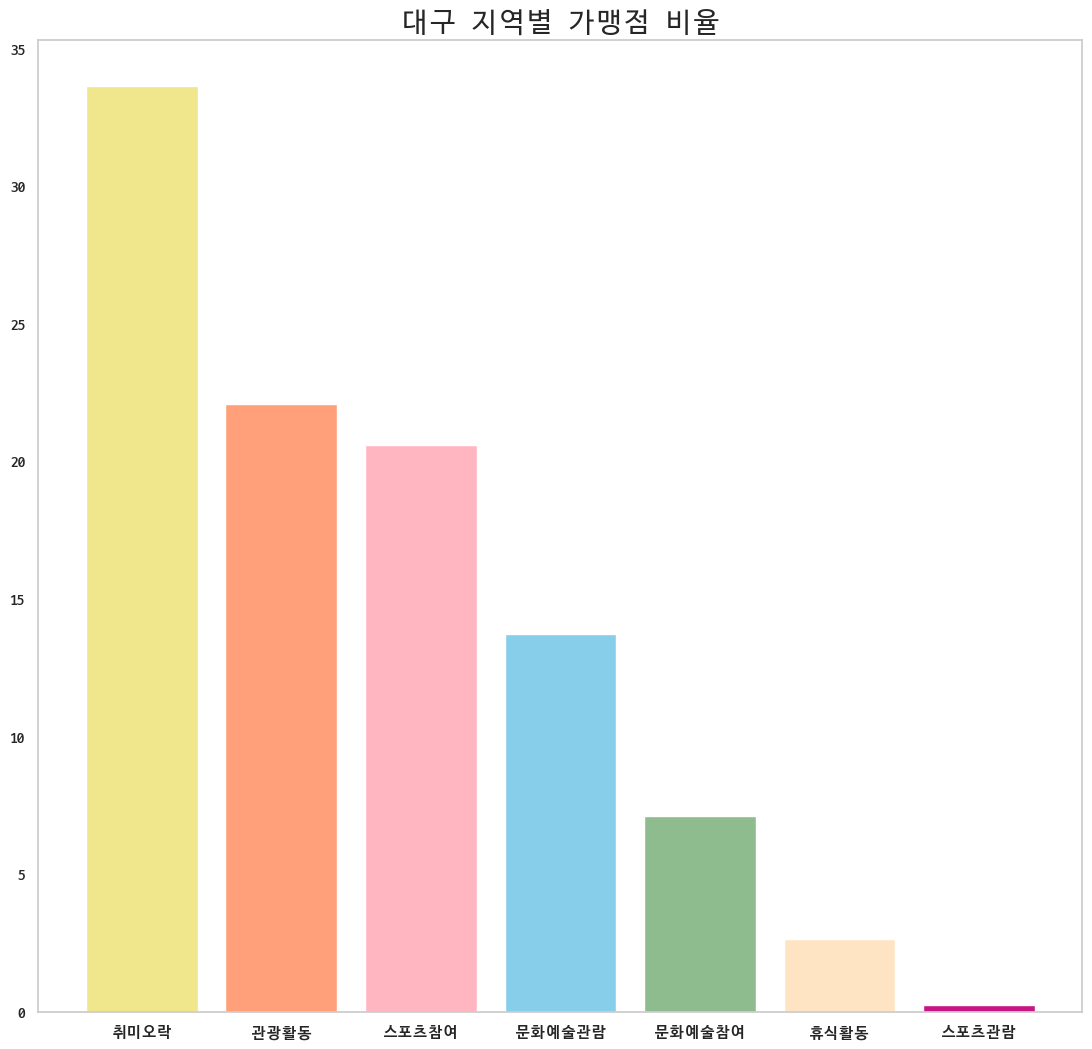

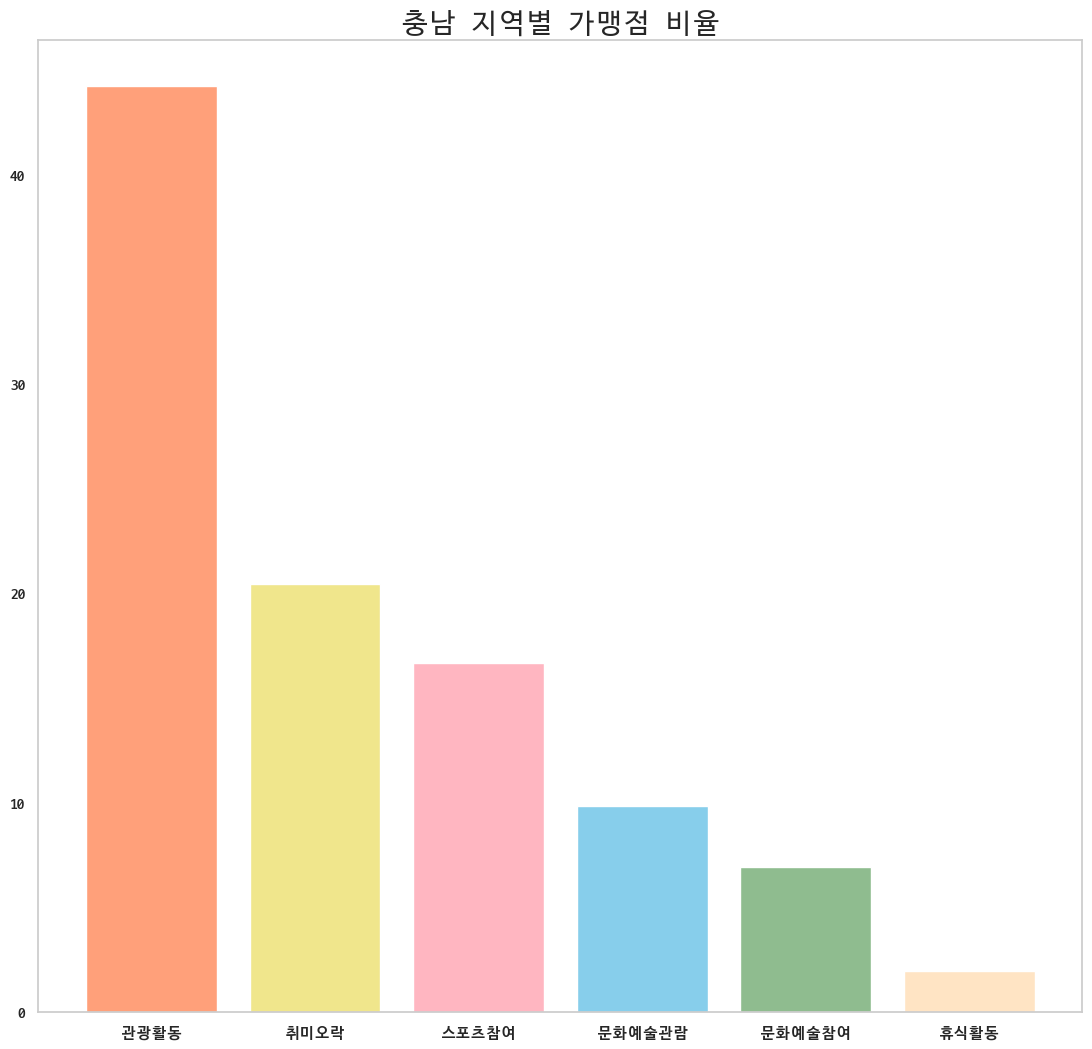

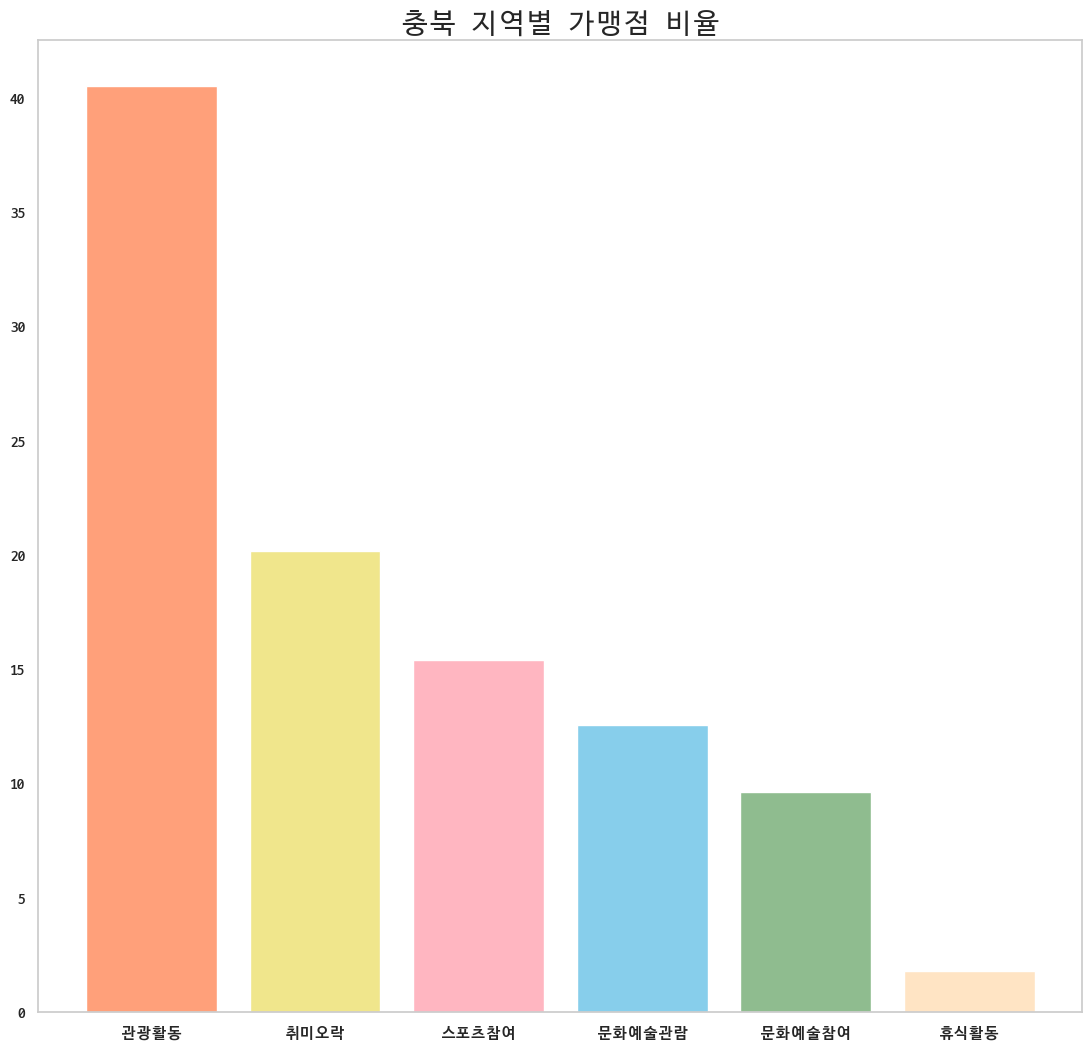

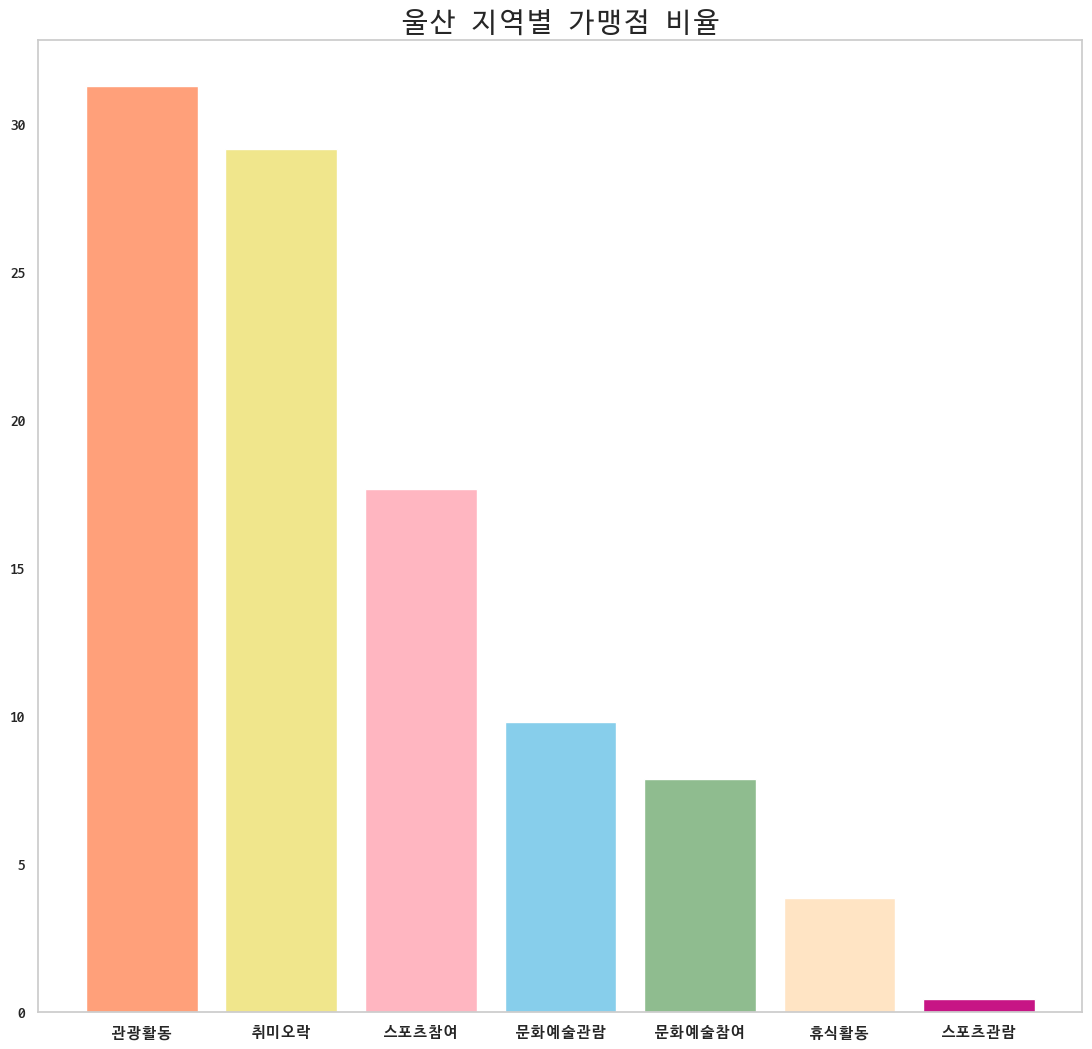

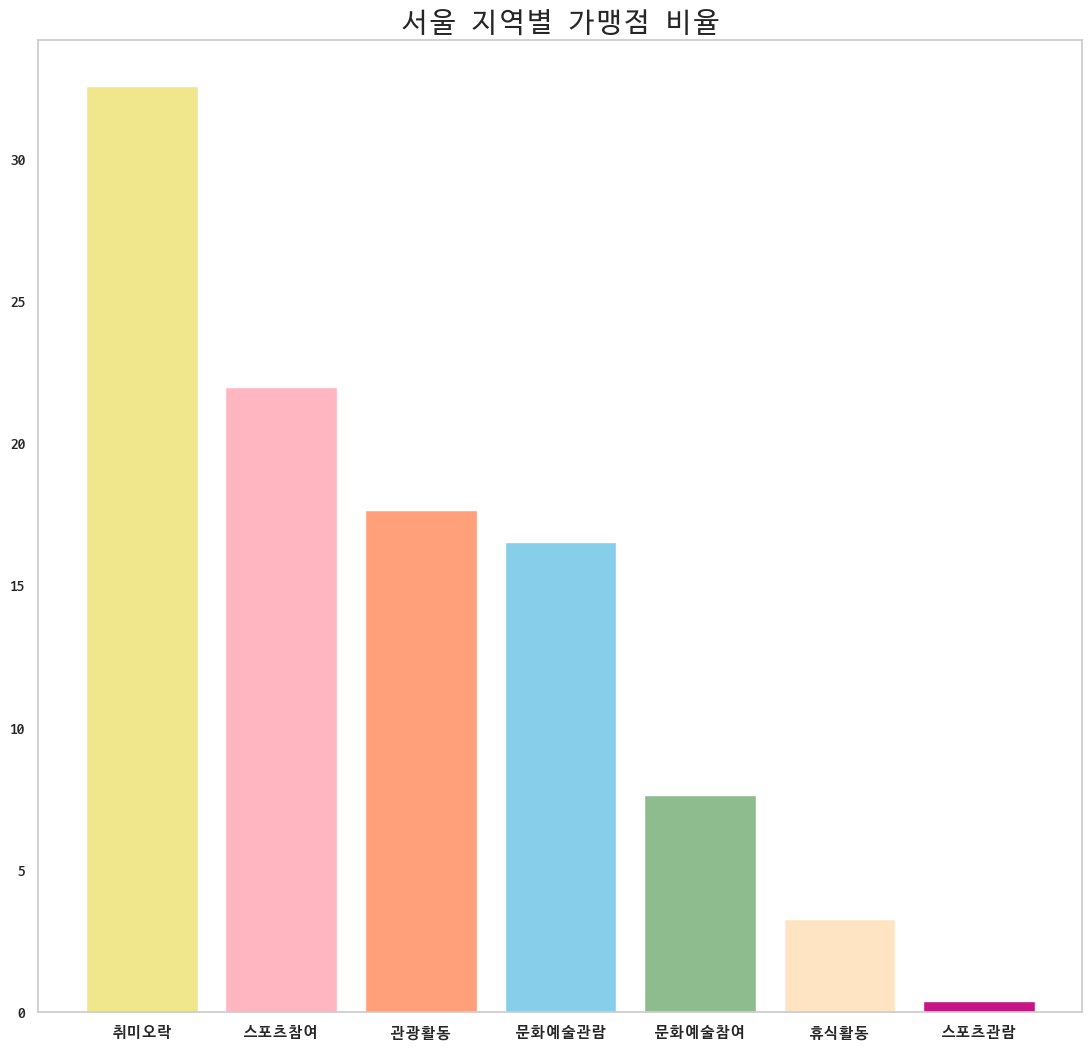

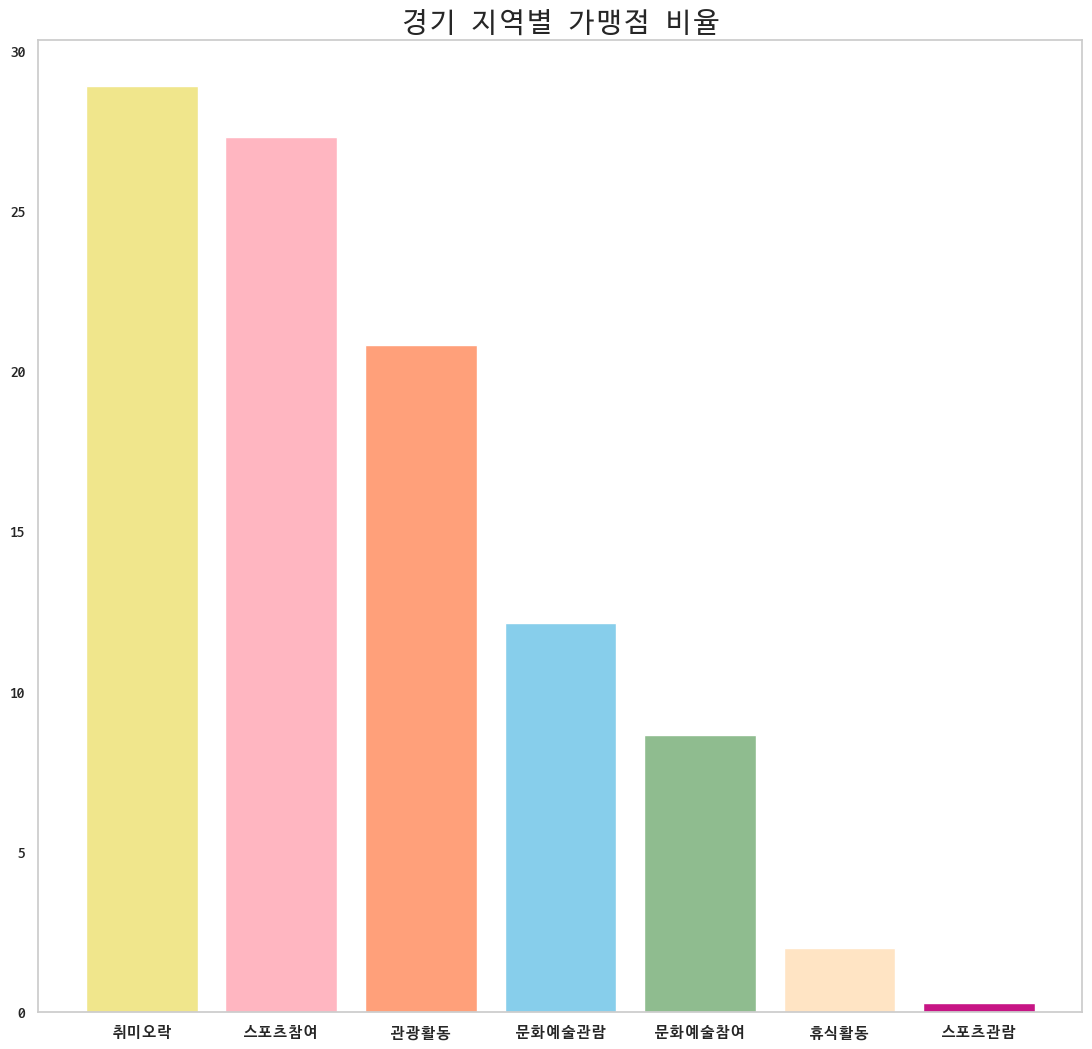

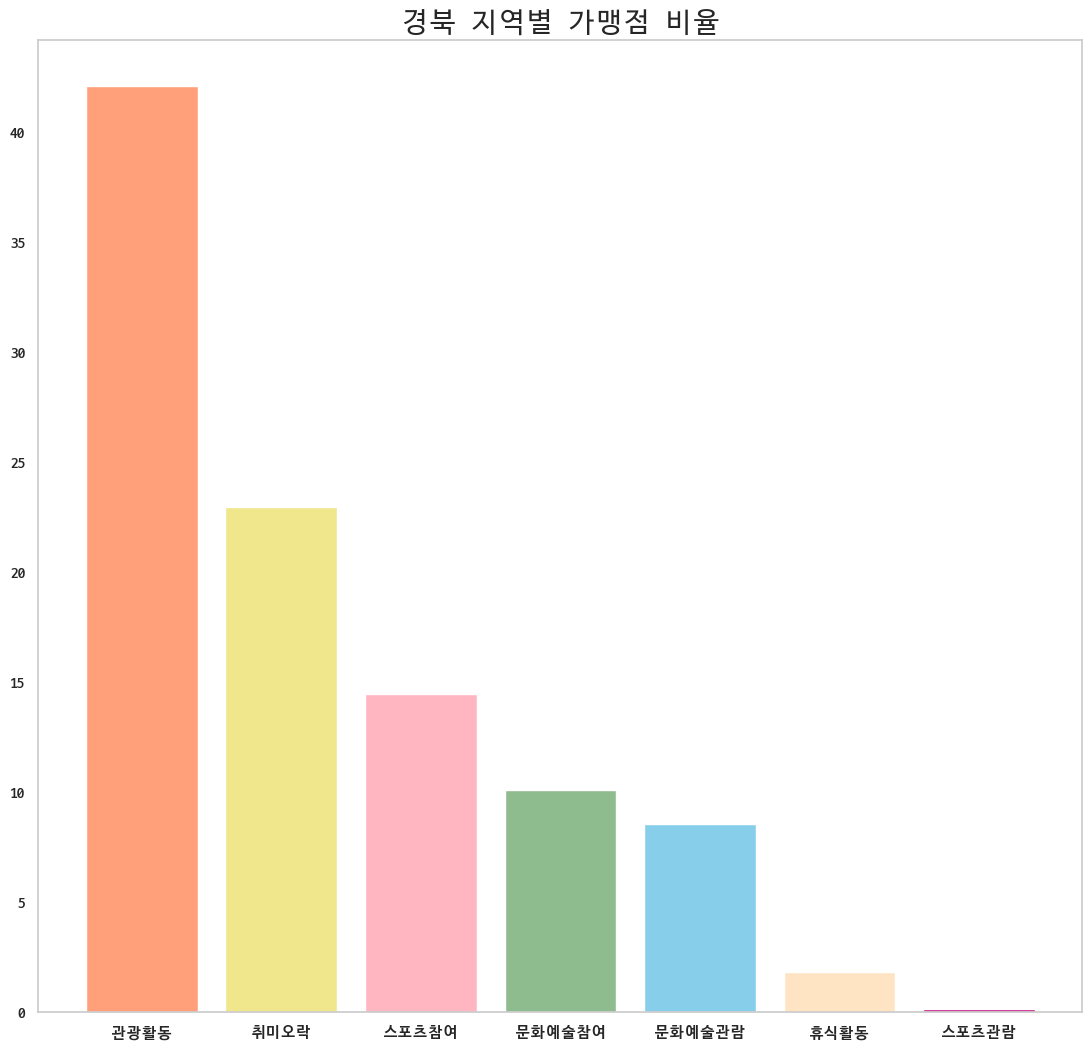

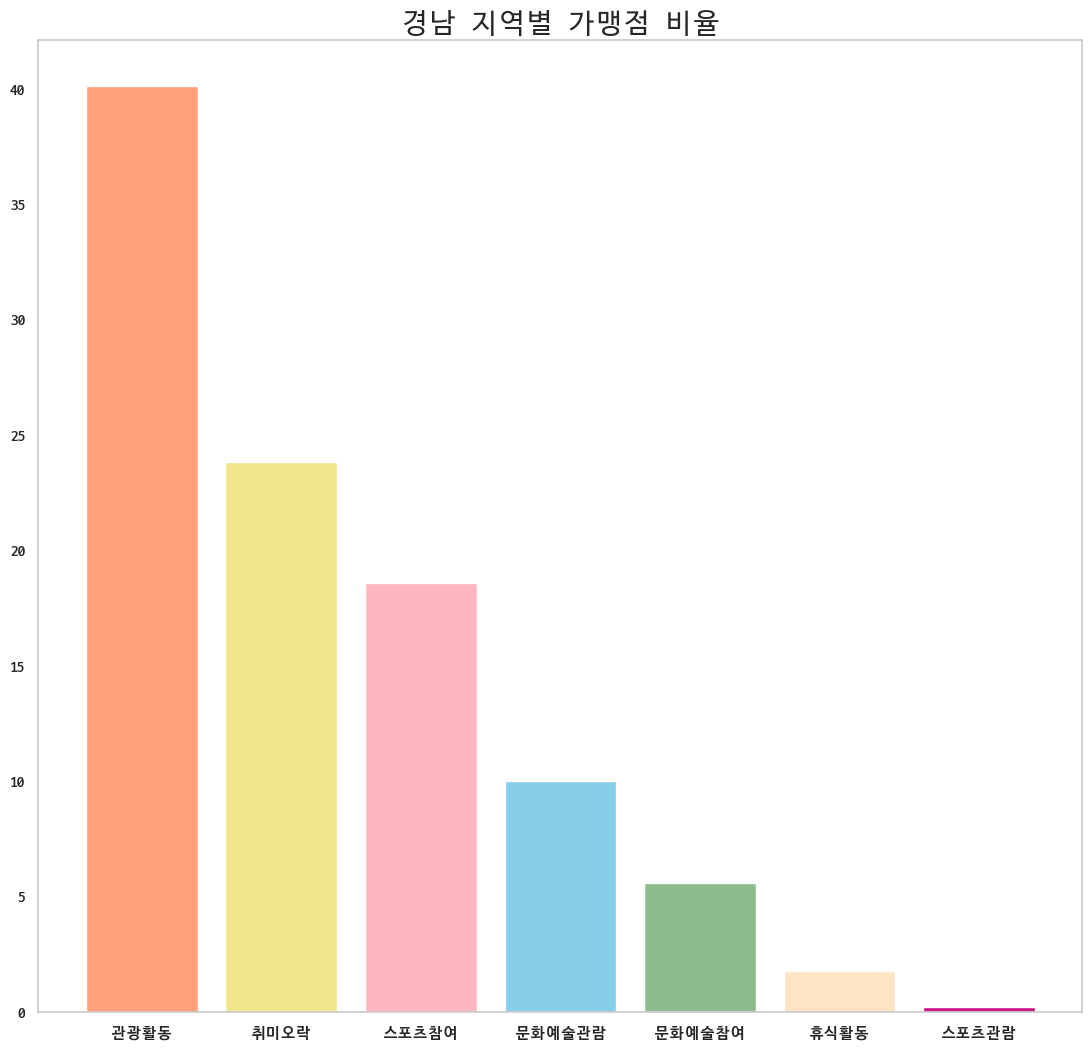

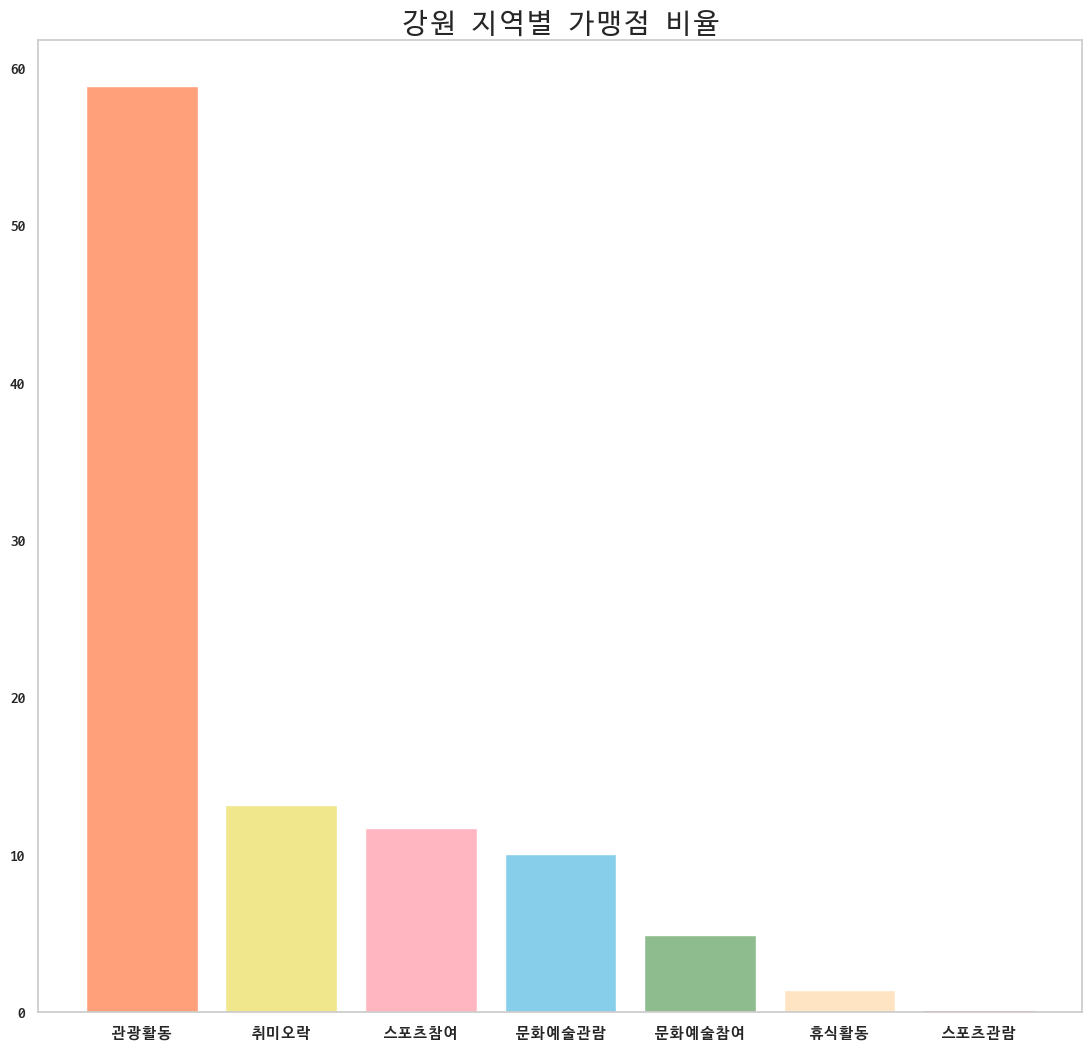

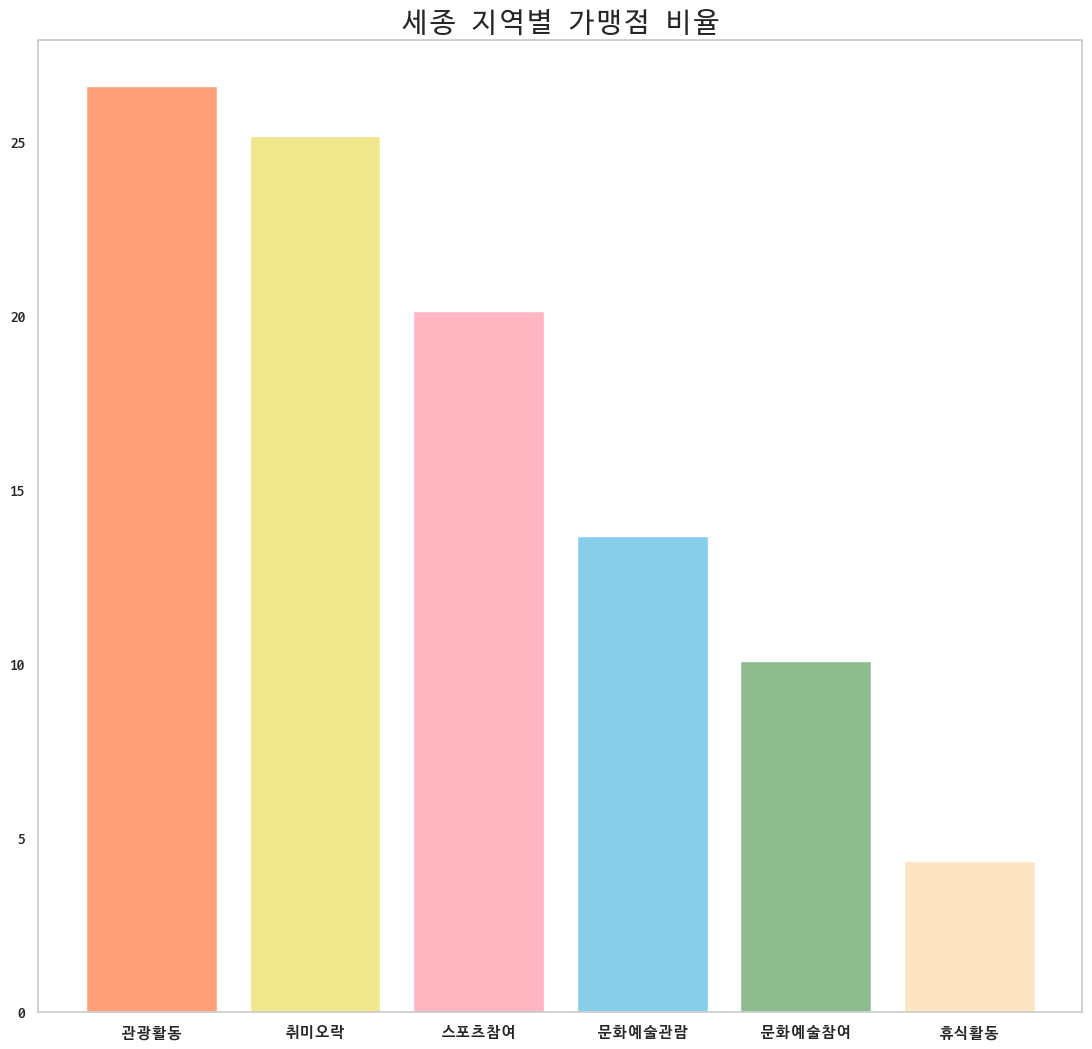

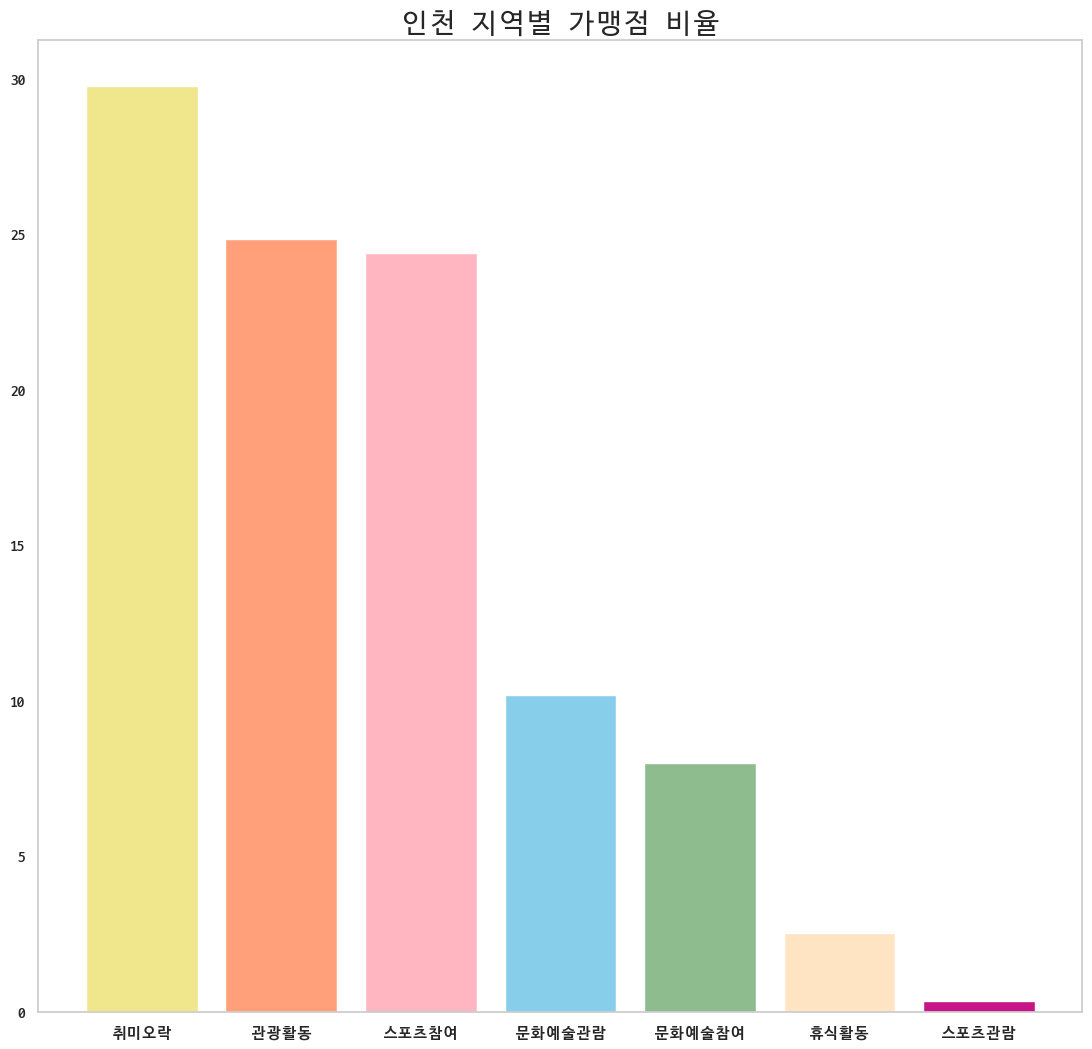

In [214]:
for geo in result_df["지역"].unique():
    data = result_df[result_df["지역"] == geo]["국민여가"].value_counts(True) * 100
    
    colors = {"관광활동":'lightsalmon','취미오락':'khaki', '스포츠참여':'lightpink', 
              '문화예술참여':'darkseagreen', '문화예술관람':'skyblue', '휴식활동':'bisque', '스포츠관람':'mediumvioletred'}
    
    plt.figure(figsize=(12, 12))
    plt.title(f'{geo} 지역별 가맹점 비율', fontsize = 20)
    plt.bar(x=data.index,height=data.values,color=[colors[c] for c in data.index])
    plt.savefig('nuri_img_{}'.format(geo))
    plt.show()

In [ ]:
data_total =culture.iloc[0,2:].sort_values(ascending=False)
data_total

In [82]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
culture

In [ ]:
culture_geo = culture.iloc[3:,:]

In [ ]:
culture_geo

In [ ]:
culture_geo.분류.unique()

In [ ]:
len(culture_geo)

In [ ]:
culture_geo.replace('-',0)

### 국민여가 파이차트

In [71]:
culture3 = culture.iloc[3:]
culture3.head()

,분류,표본수,문화예술관람활동,문화예술참여활동,스포츠관람활동,스포츠참여활동,관광활동,취미오락활동,휴식활동,사회및 기타활동
4,서울,1195,2.7,1,2.3,10.3,2.3,23.5,52.1,5.9
5,부산,691,-,0.5,0.6,7.9,-,15,62.5,13.5
6,대구,580,-,0.3,1.1,4.8,0.2,16.7,73.8,3.1
7,인천,624,0.5,0.6,1.1,4.6,0.4,29.9,59.8,3.1
8,광주,452,3.9,1.4,1.1,9.8,1,16.7,58.9,7.1


In [104]:
for cname, hex in mpl.colors.cnames.items():
    print(cname,hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


In [ ]:
 colors = {"관광활동":'lightsalmon','취미오락':'khaki', '스포츠참여':'lightpink', 
              '문화예술참여':'darkseagreen', '문화예술관람':'skyblue', '휴식활동':'plum', '스포츠관람':'mediumvioletred'}

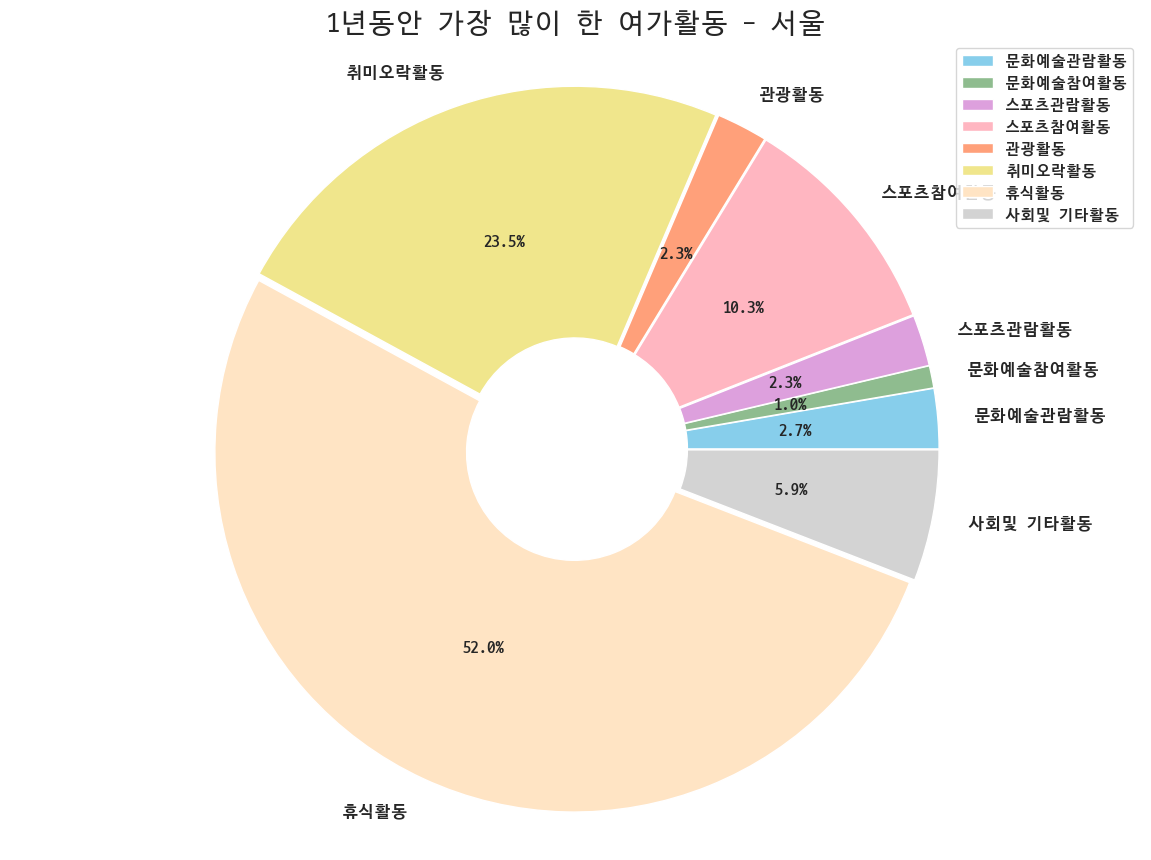

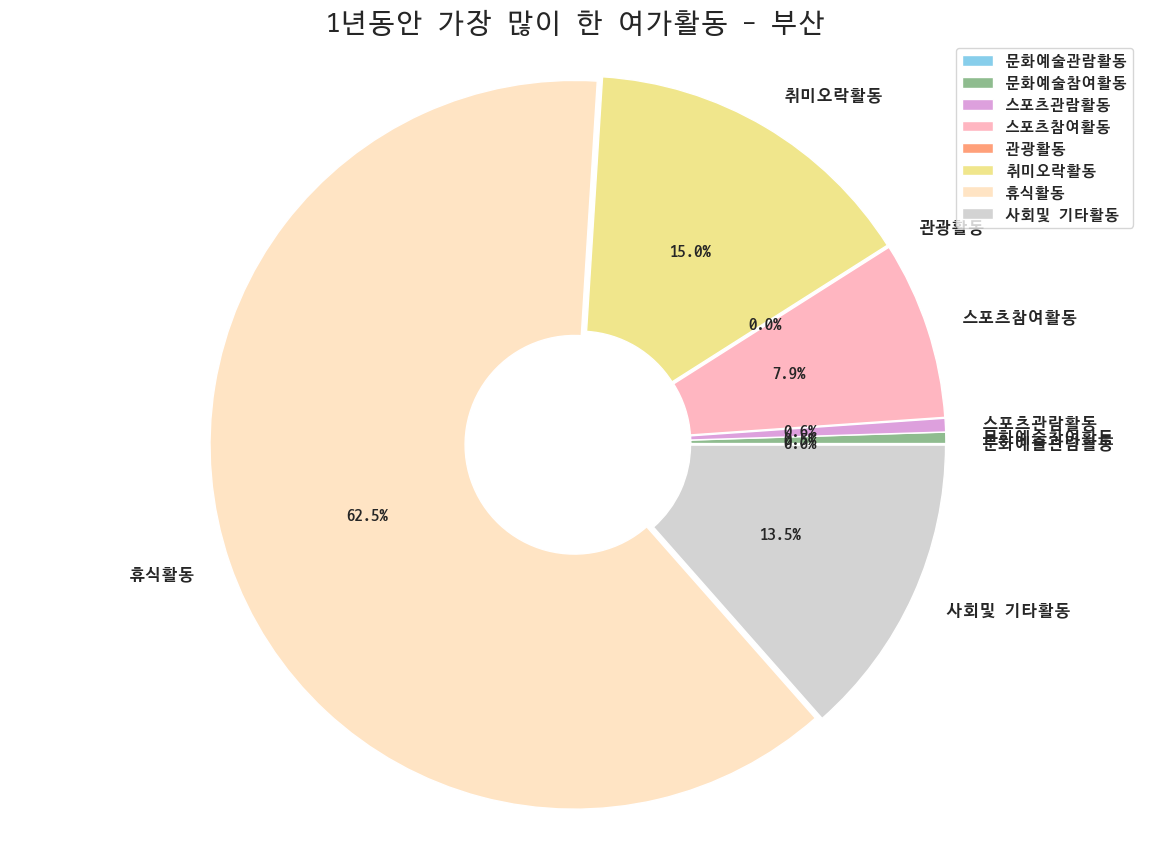

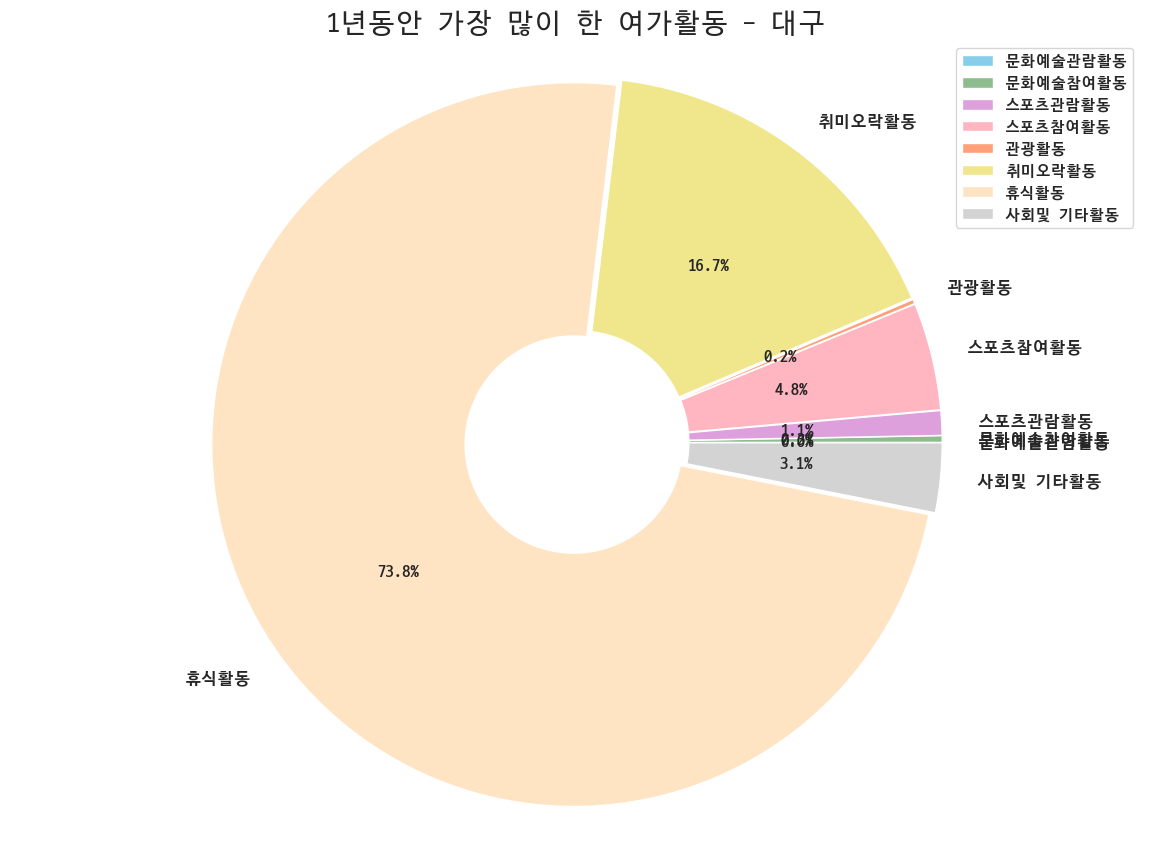

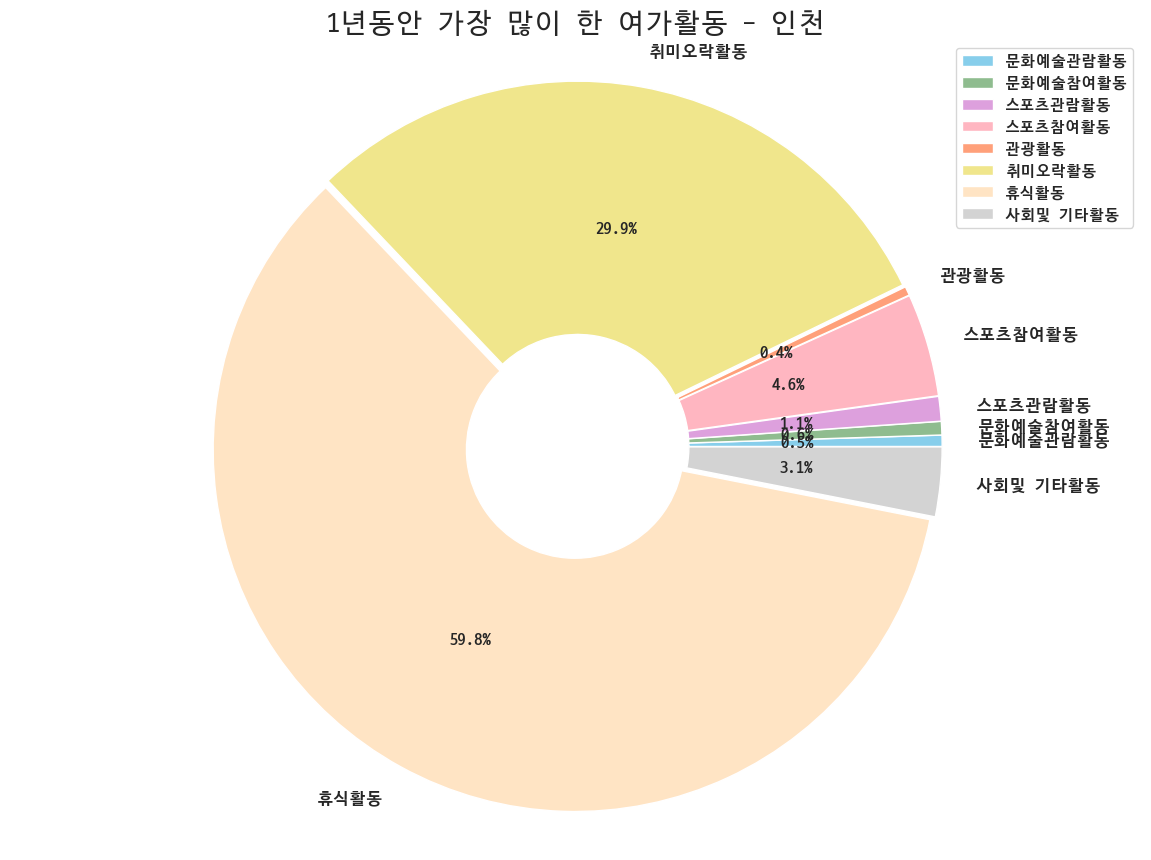

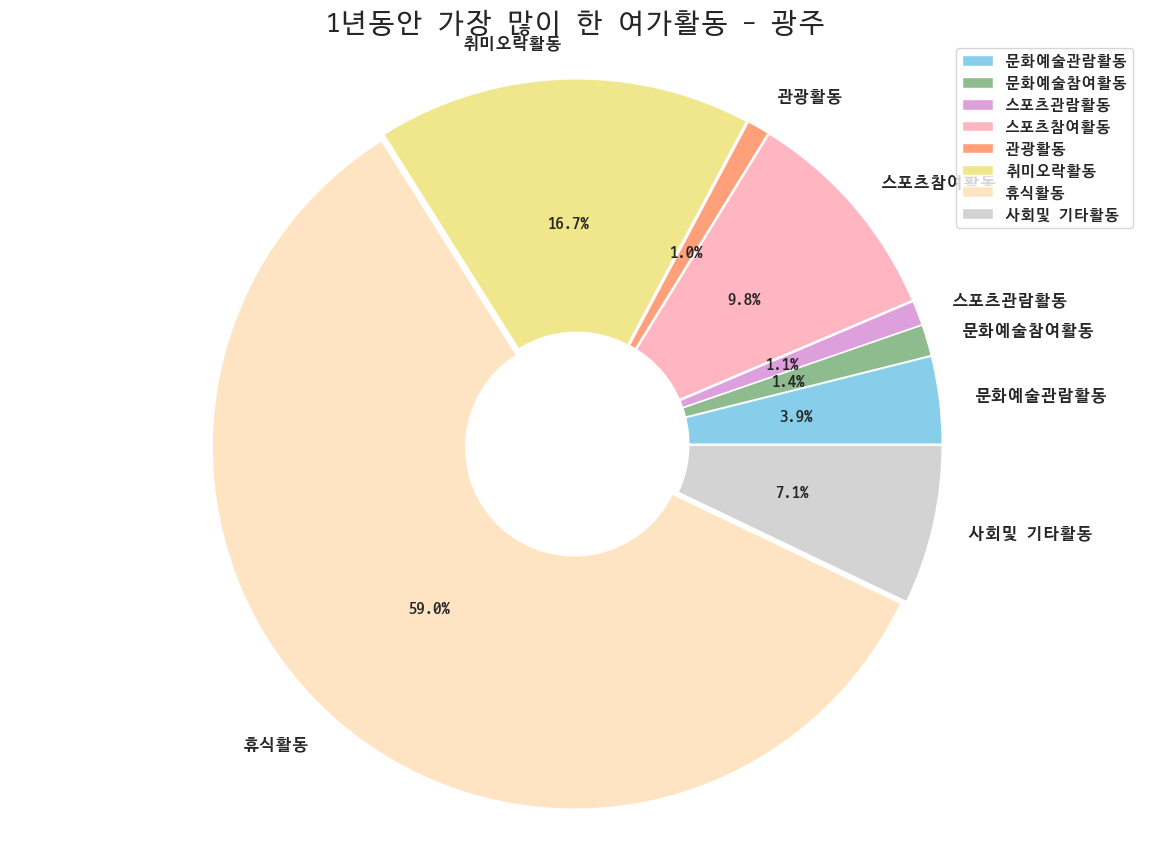

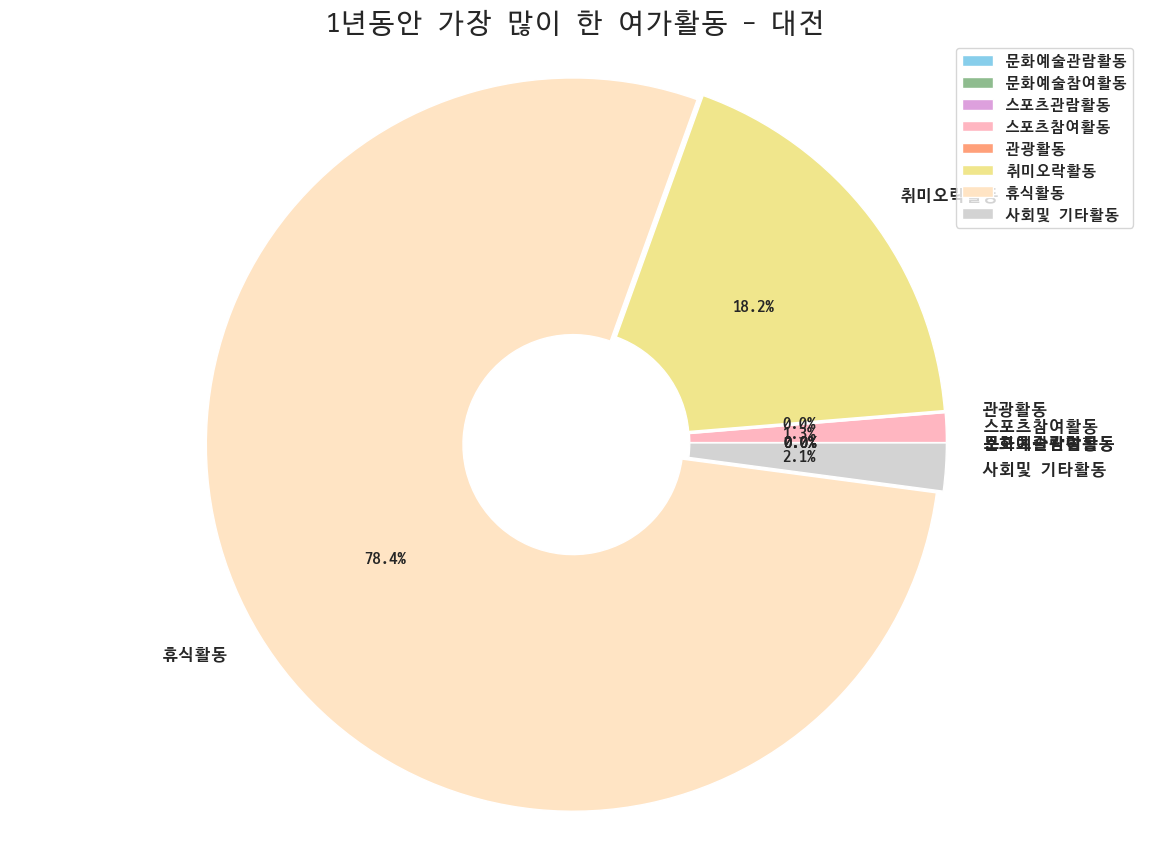

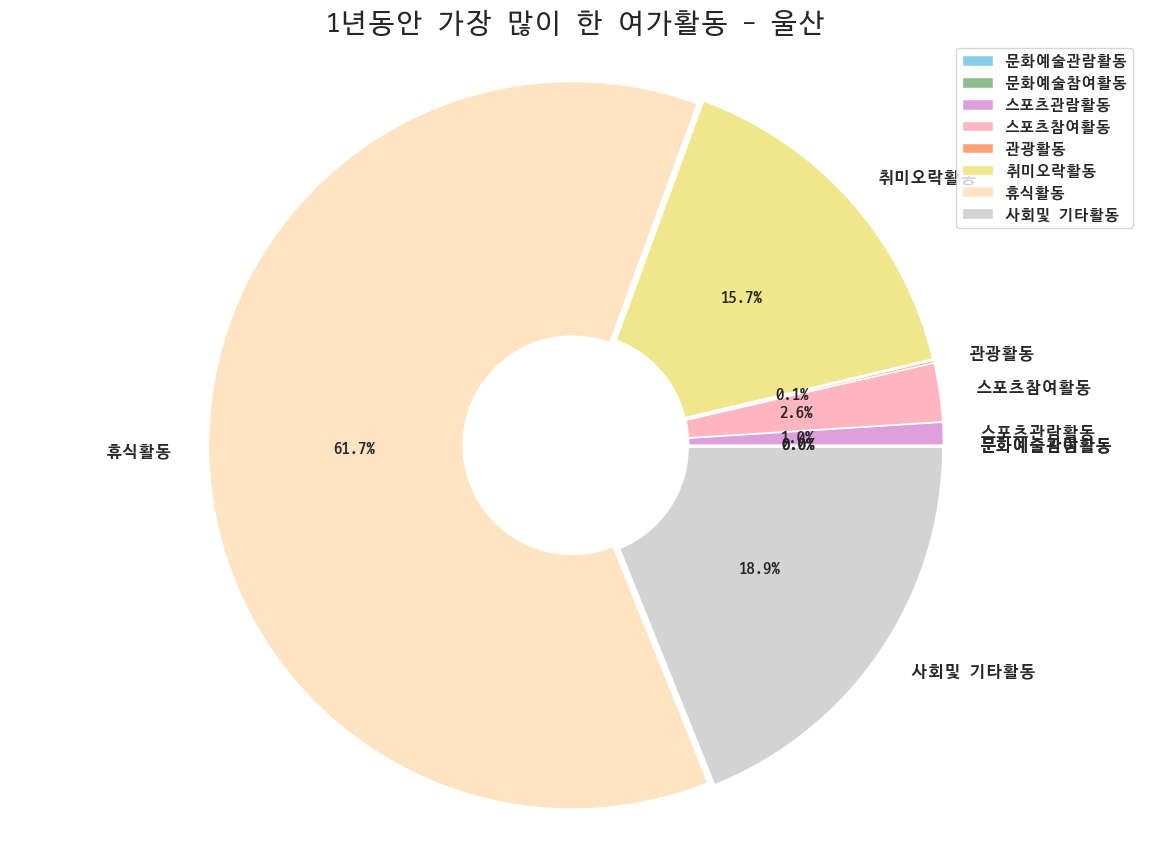

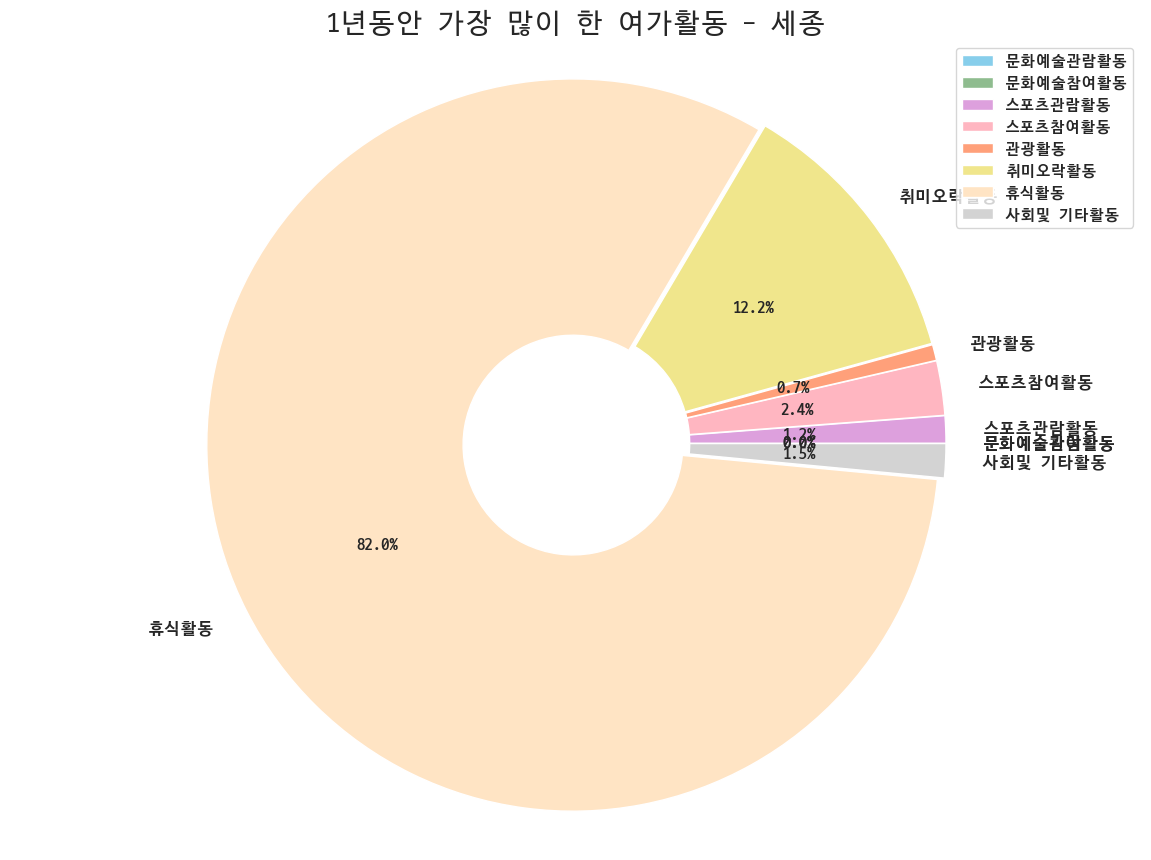

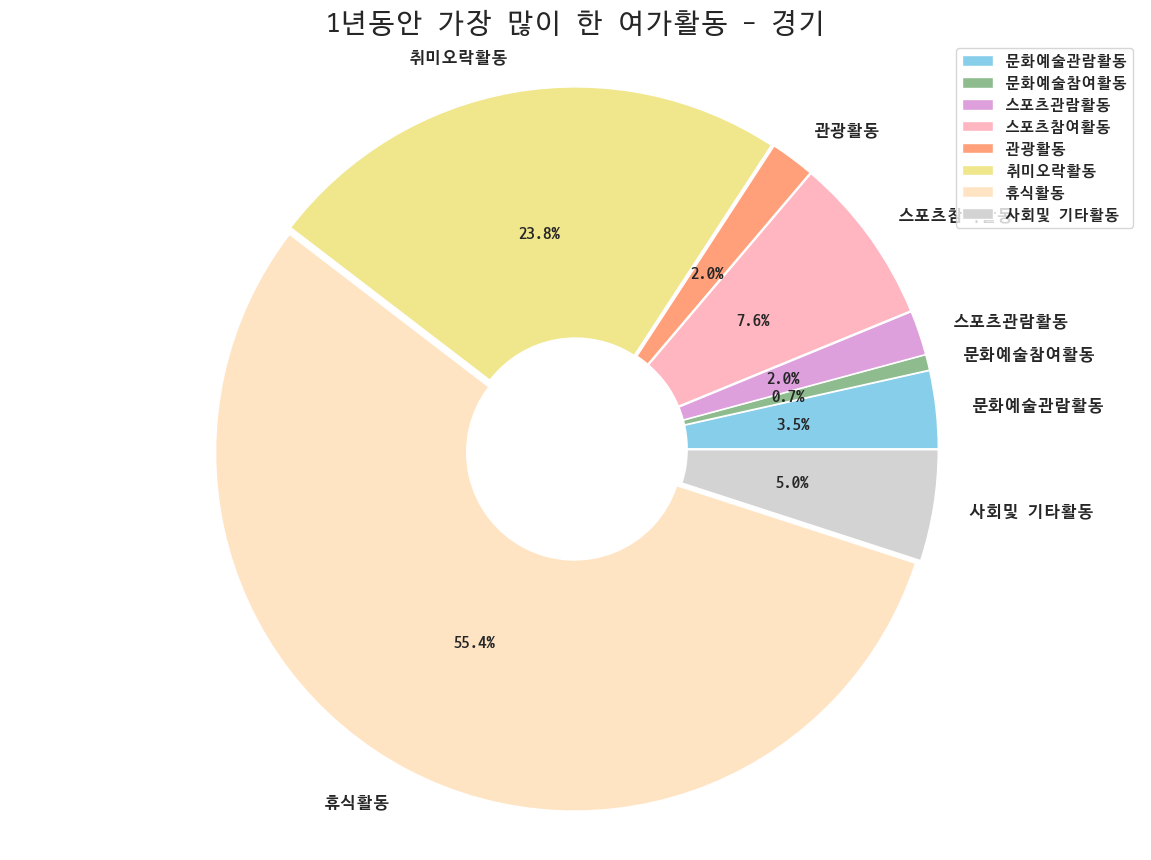

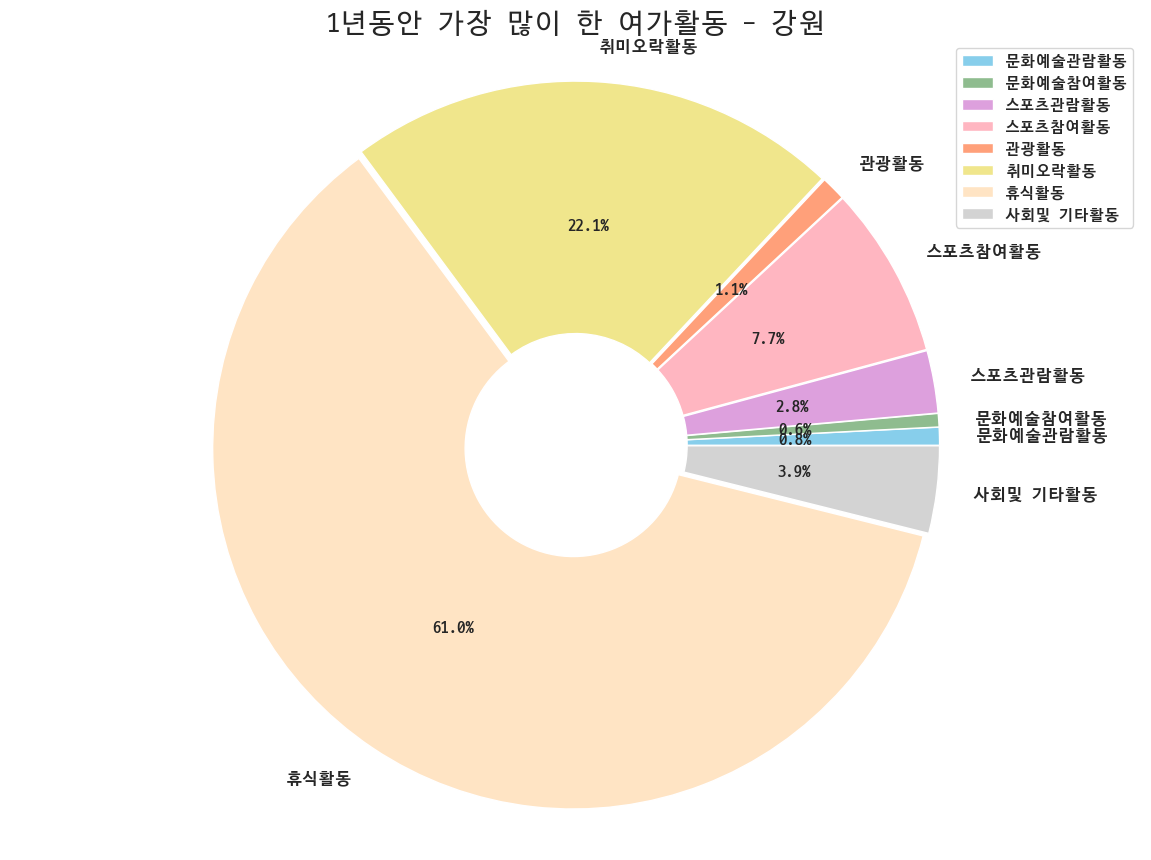

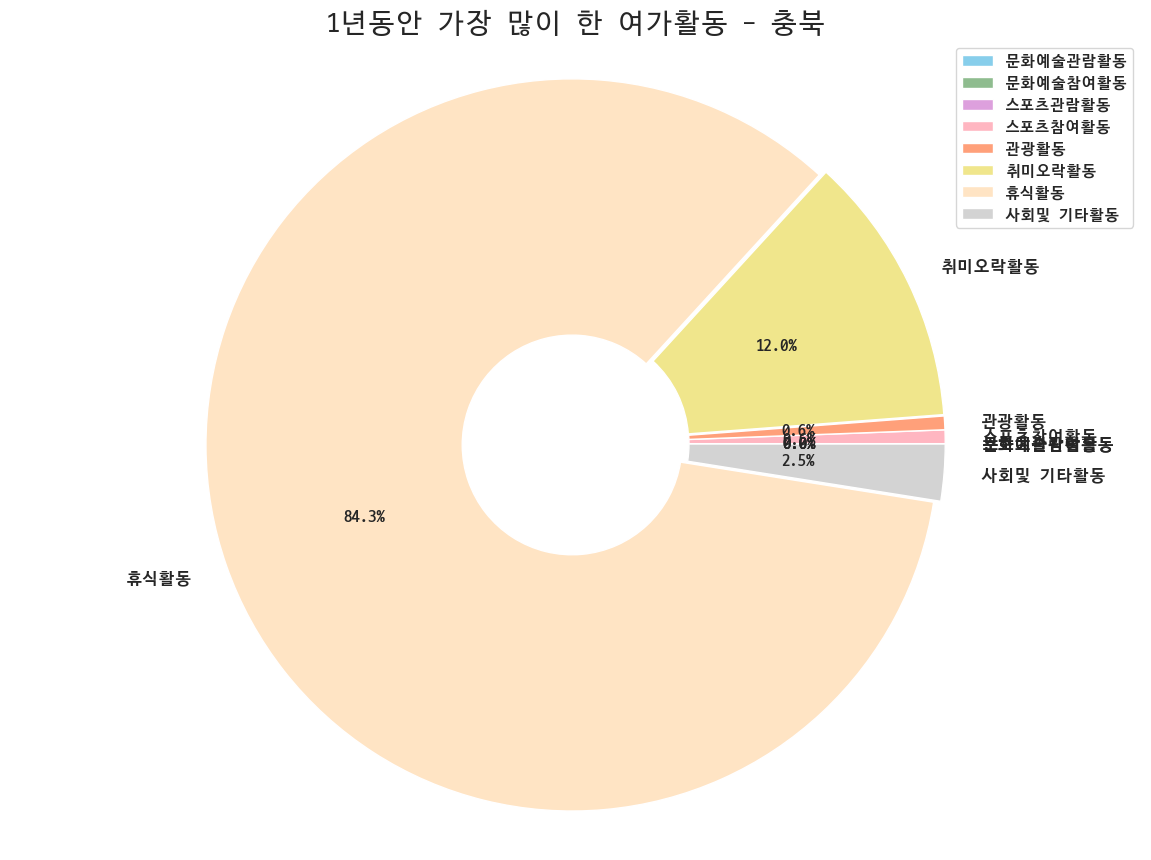

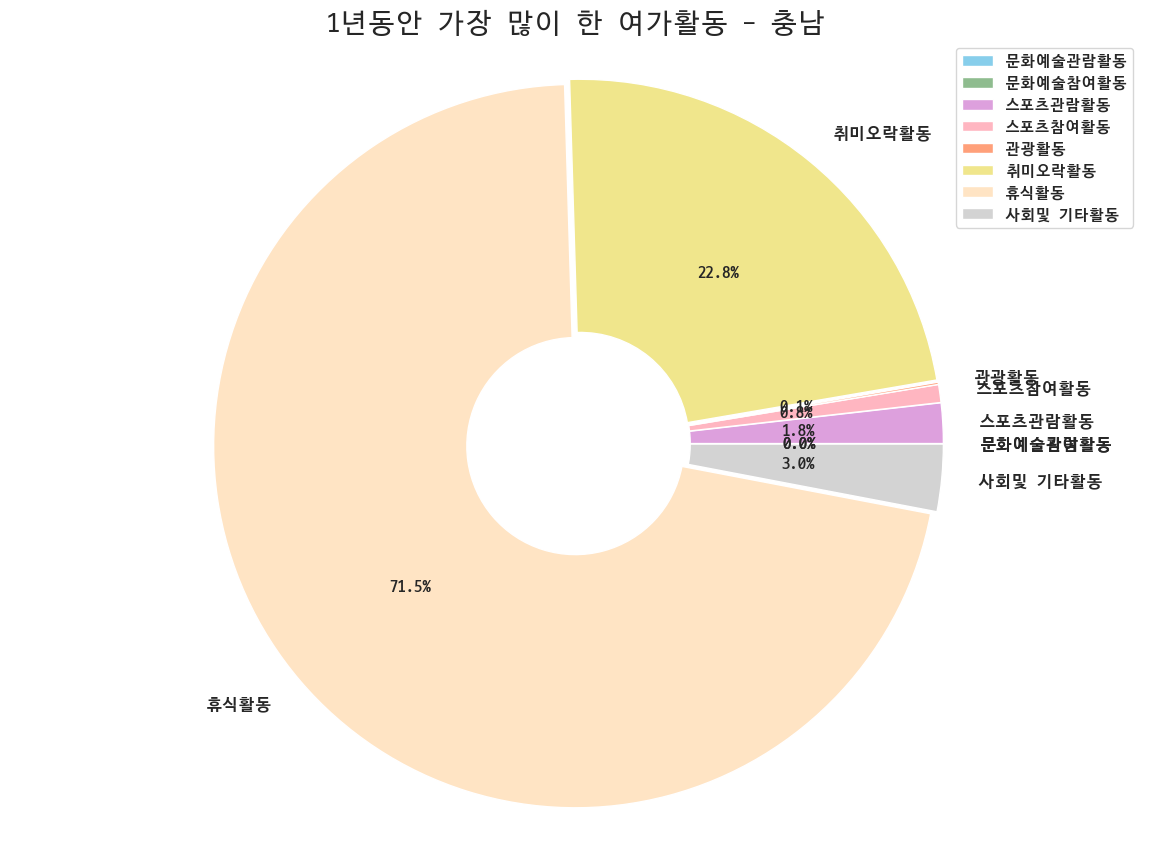

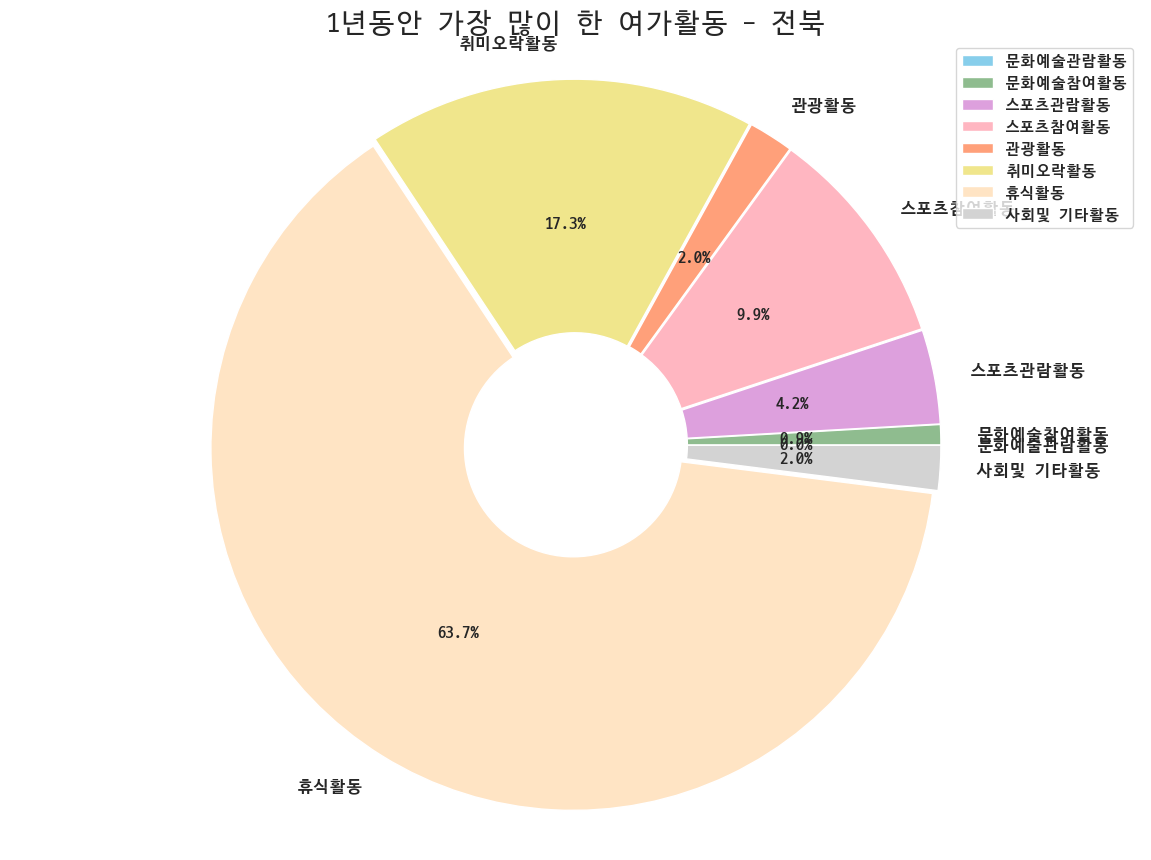

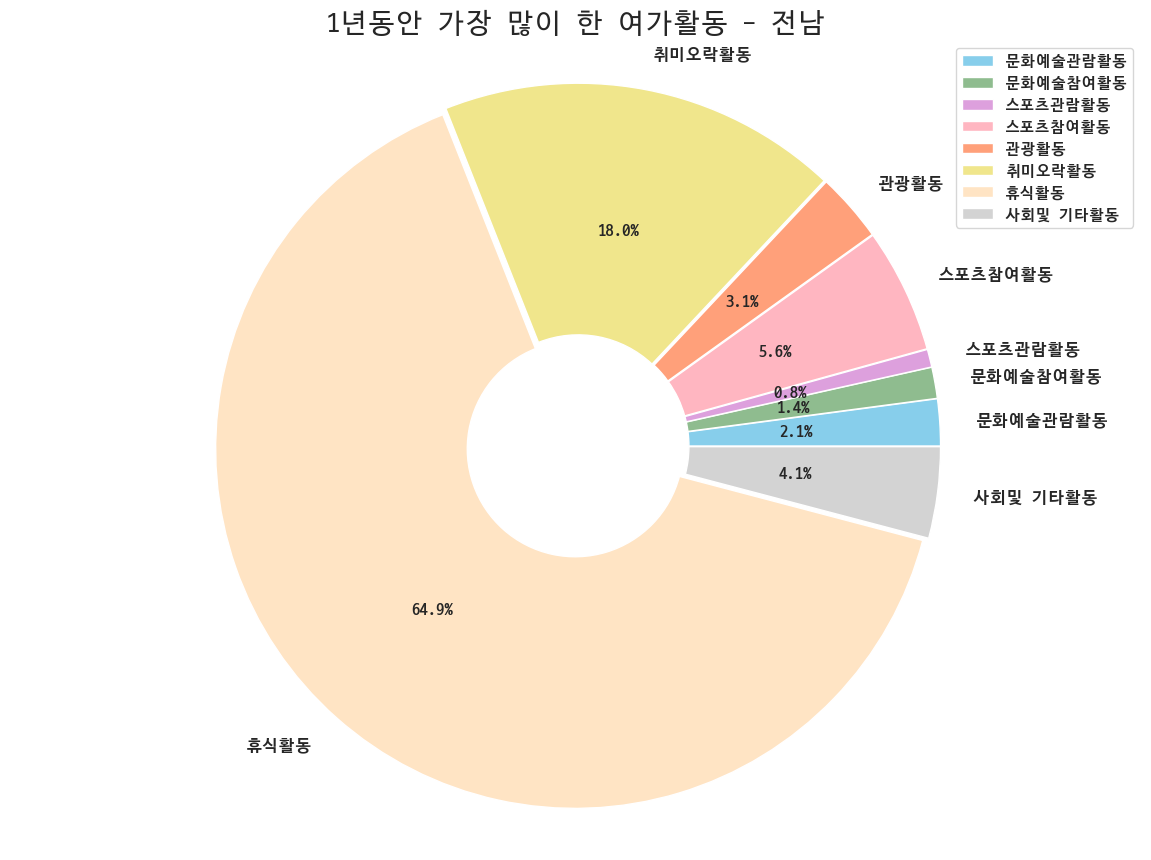

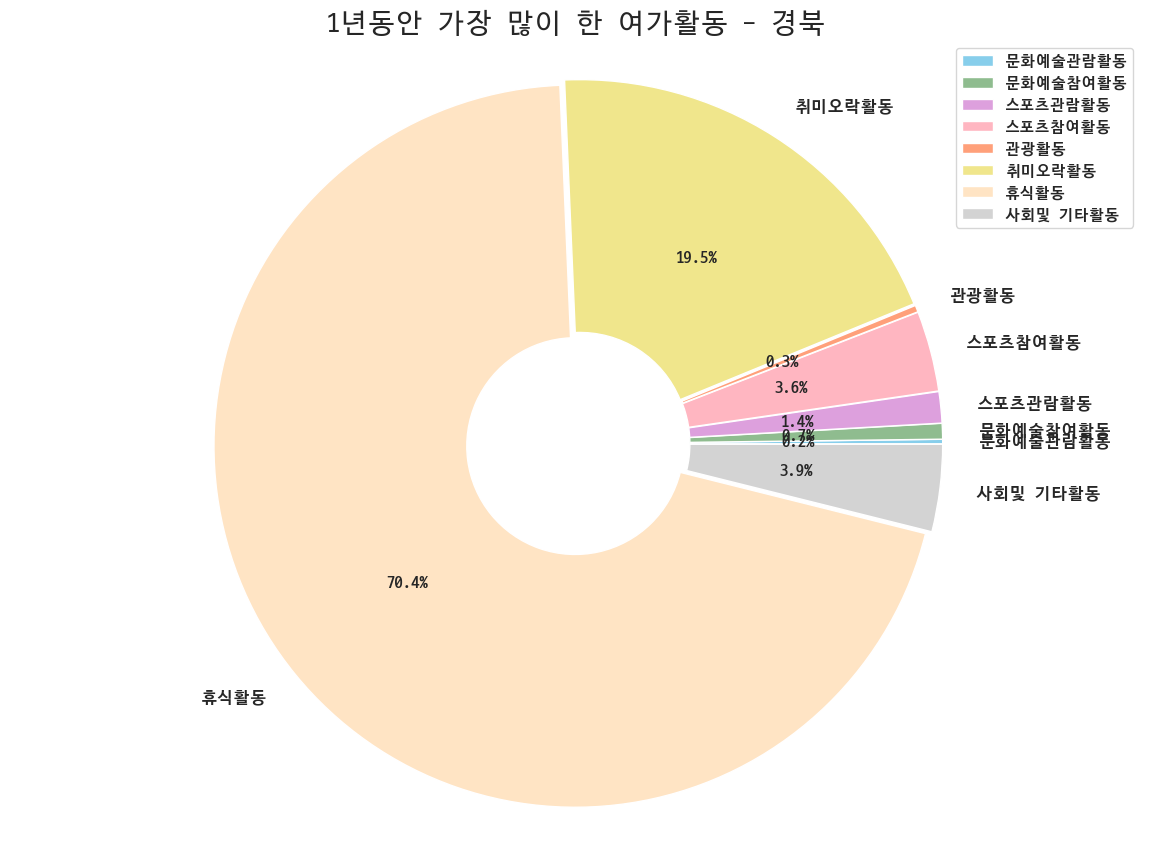

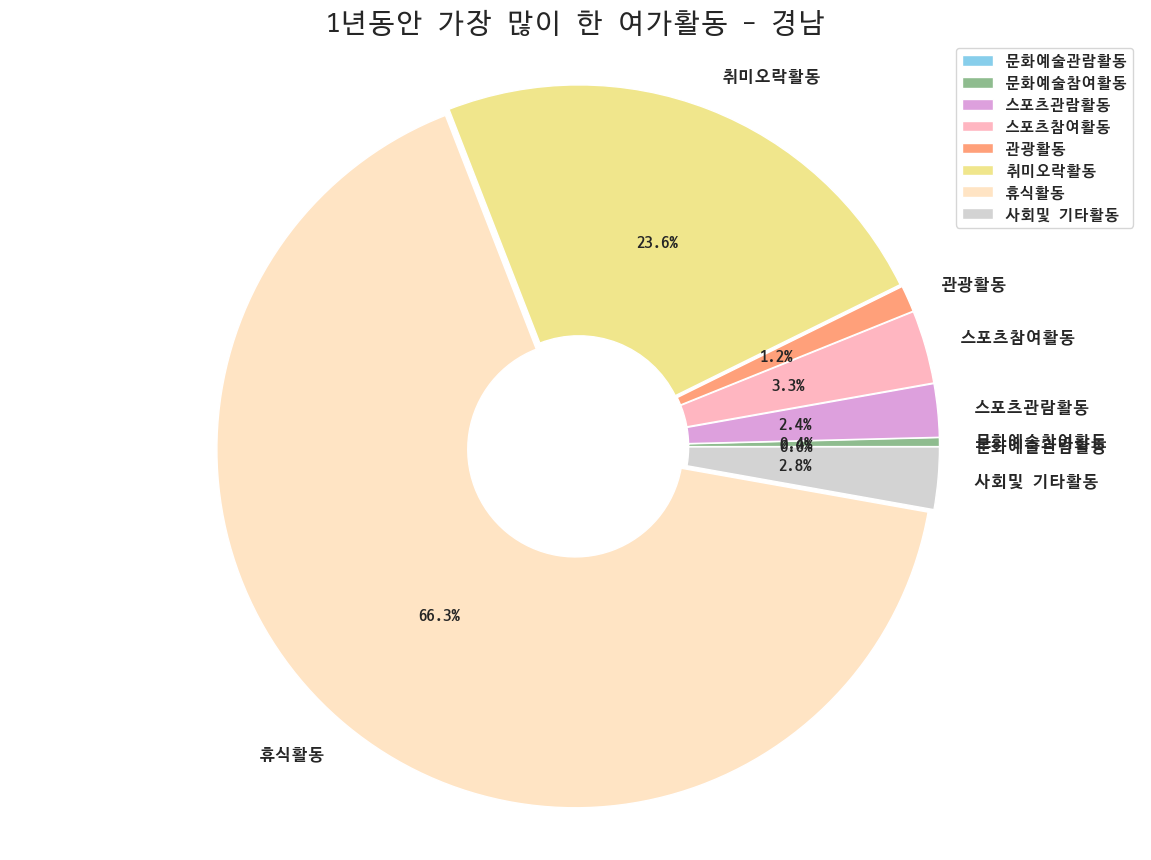

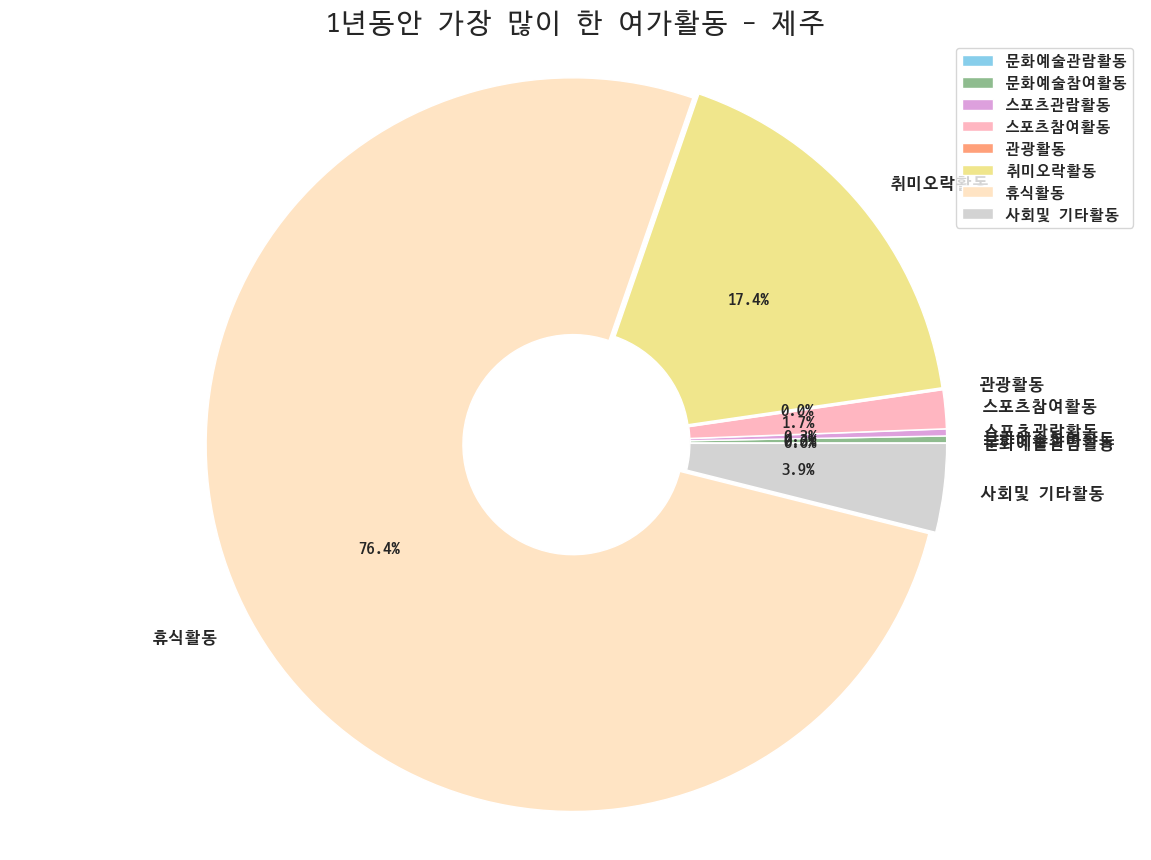

In [204]:
culture3 = culture.iloc[3:]

culture3 = culture3.set_index('분류')

culture3.replace('-', 0, inplace=True)
del culture3['표본수']

labels = culture3.loc[i].index#FFDAB9']
colors = ['#87CEEB', '#8FBC8F', '#DDA0DD', '#FFB6C1','#FFA07A','#F0E68C','#FFE4C4','#D3D3D3']
wedgeprops={'width': 0.7}

for i in culture3.index:
    plt.figure(figsize=(13, 10))
    plt.pie(culture3.loc[i].values,
            labels = labels,
            colors = colors,
            explode=[ 0.01 for _ in range(len(culture3.loc[i].index))],
            wedgeprops=wedgeprops,
            textprops={'fontsize': 12}, # text font size
            autopct='%1.1f%%')
    plt.title(f'1년동안 가장 많이 한 여가활동 - {i}',fontsize=20)
    plt.axis('equal')
    #plt.style.use('')
    plt.legend()
    plt.savefig('cul_img_{}'.format(i))  #그래프 파일 저장
    plt.show()

    
plt.show()

### 누적 그래프

In [ ]:
#지역별로 분류 비율 추가하기
result= []
for cat in nuri_offline["지역"].unique():
    data = nuri_offline[nuri_offline["지역"] == cat]["분류"].value_counts(True).to_frame() *100
    data["지역"] = cat
    result.append(data)   

In [ ]:
final = pd.concat(result).reset_index()

In [ ]:
final

In [ ]:
#column명 재설정
final.columns = ["분류", "비율", "지역"]

In [ ]:
#지역별 분류 비율 포함한 데이터프레임 
final

In [ ]:
#비율의 총합이 100인지 확인
final.groupby(by="지역").sum()

In [ ]:
#분류별 누적 그래프
plt.figure(figsize=(12,12))
sns.barplot(data=final, y="분류", x="비율", hue="지역", dodge=False)

In [ ]:
#지역별 분류 누적 그래프
plt.figure(figsize=(12,12))
sns.barplot(data=final, y="지역", x="비율", hue="분류", dodge=False)